In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder

In [2]:
# Dataset
from ucimlrepo import fetch_ucirepo 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 

X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

In [3]:
# Basic EDA
print(X.describe())
print(X.info())
print(y.value_counts())

       Marital Status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                

In [4]:
if not os.path.exists('EDA_visualizations'):
    os.makedirs('EDA_visualizations')
    
if not os.path.exists('EDA_visualizations'):
    os.makedirs('EDA_visualizations')


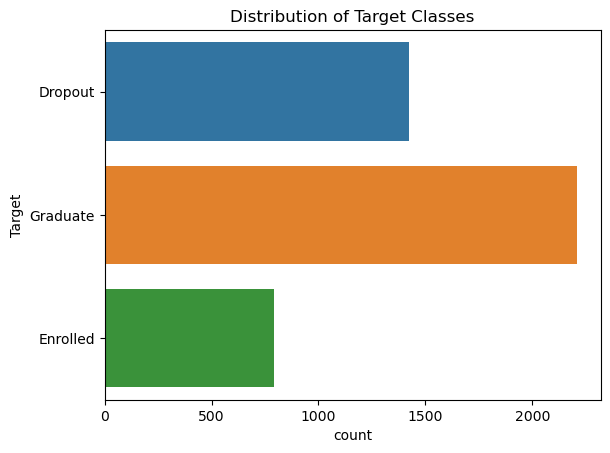

In [5]:
# Distribution of Target Classes
sns.countplot(y='Target', data=y)
plt.title('Distribution of Target Classes')
plt.savefig(f'EDA_visualizations/1Target_Class.png')
plt.show()

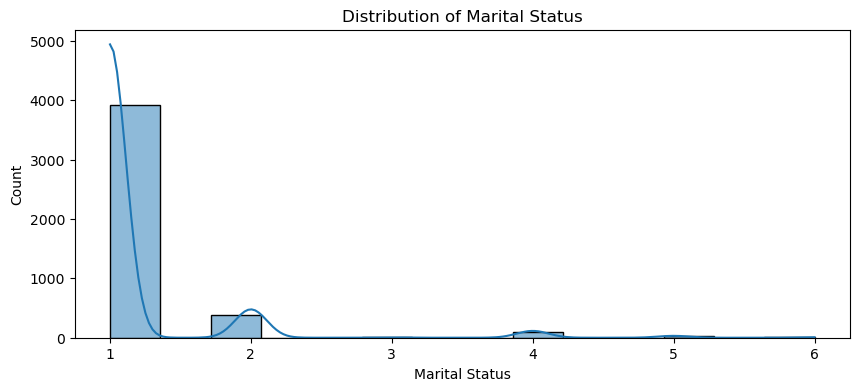

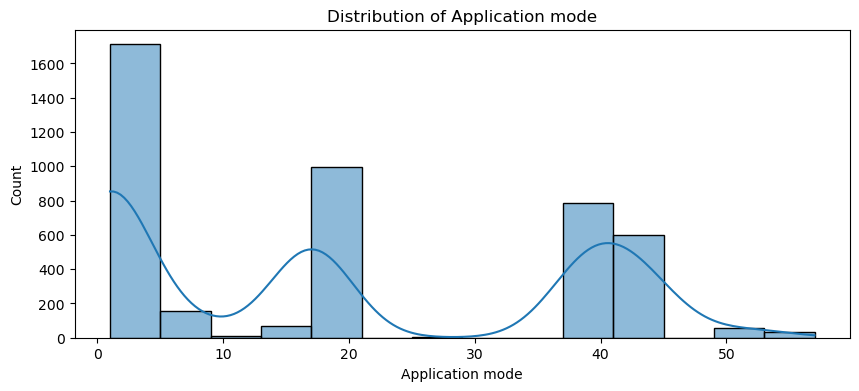

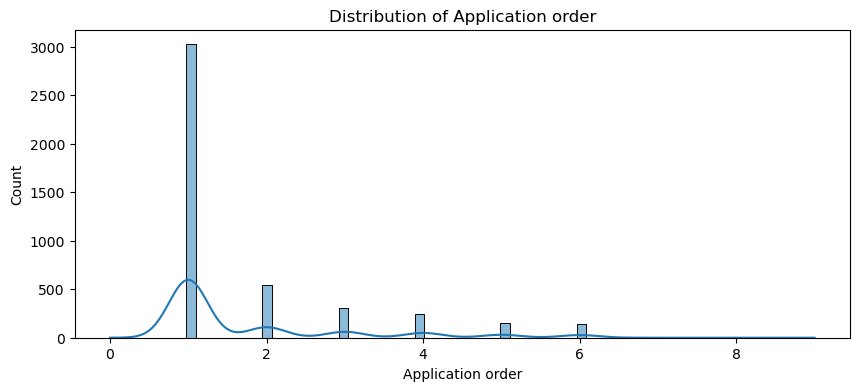

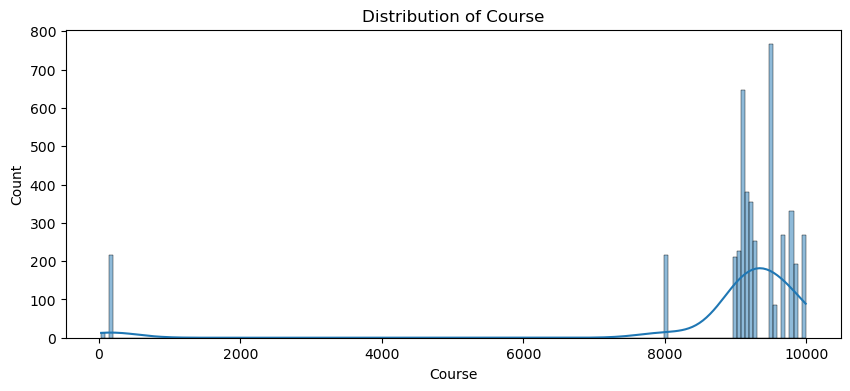

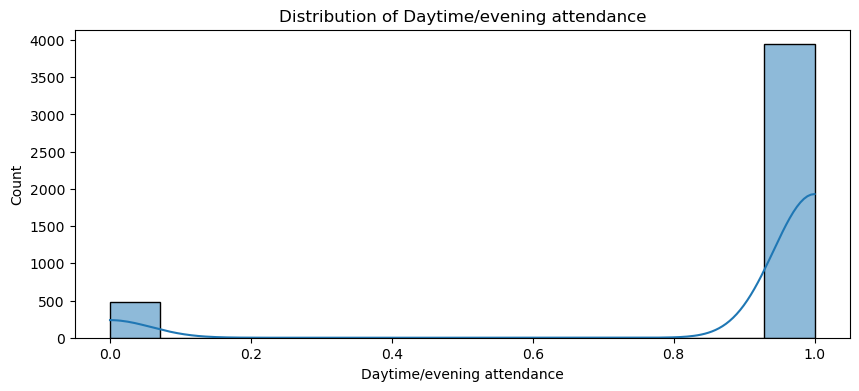

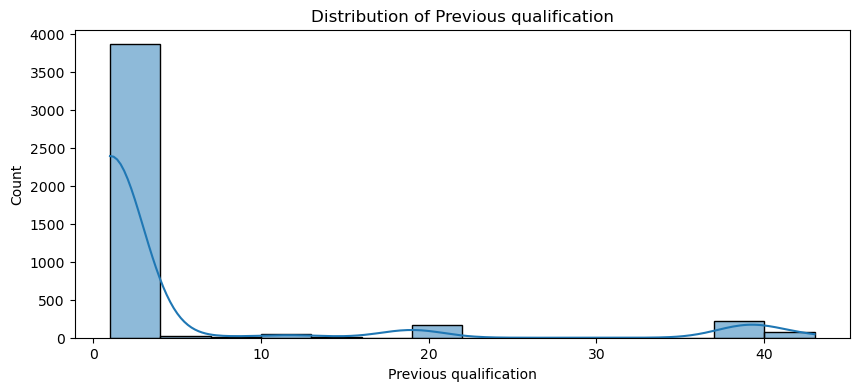

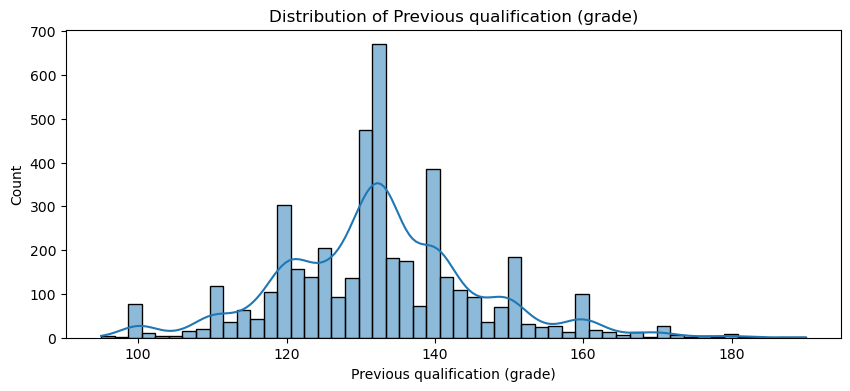

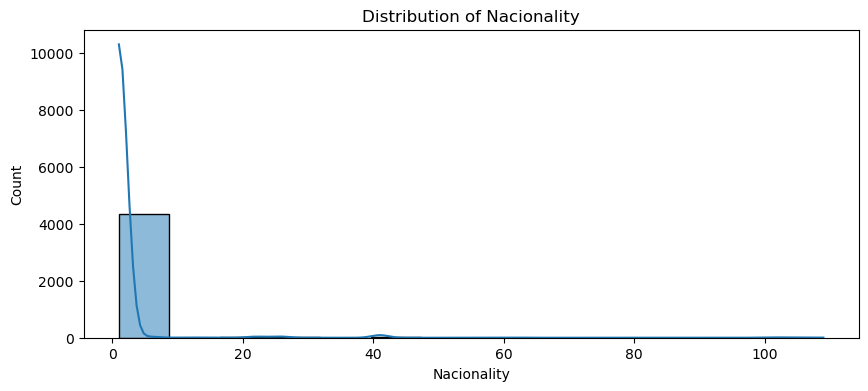

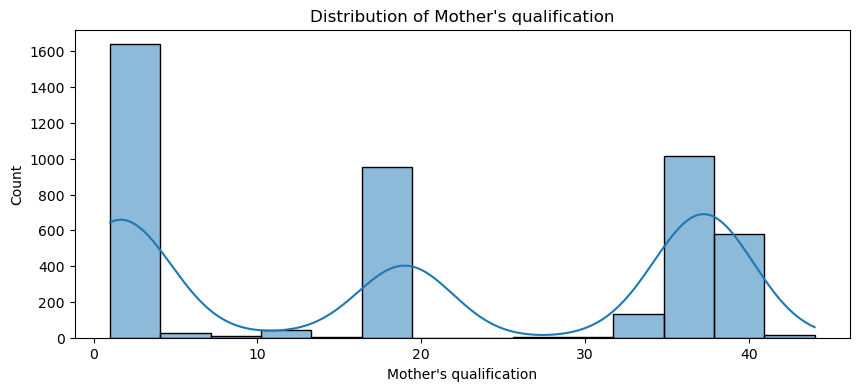

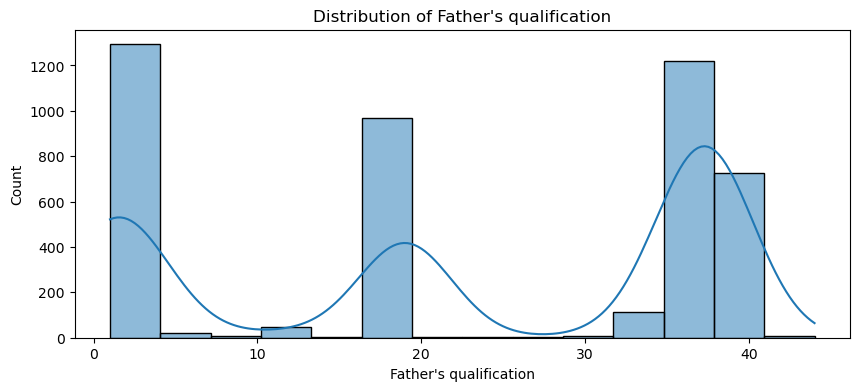

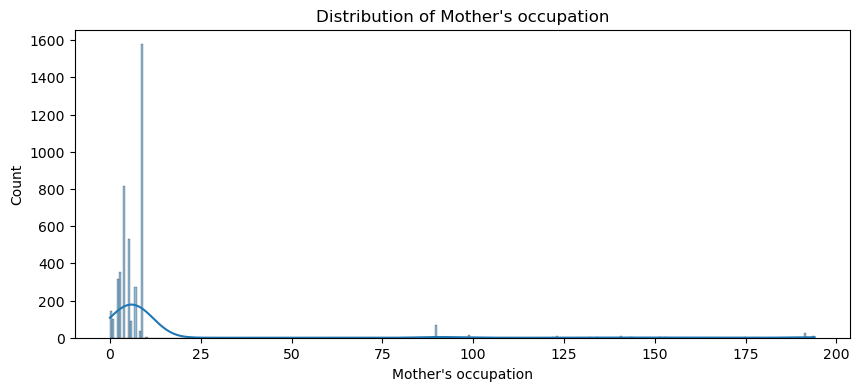

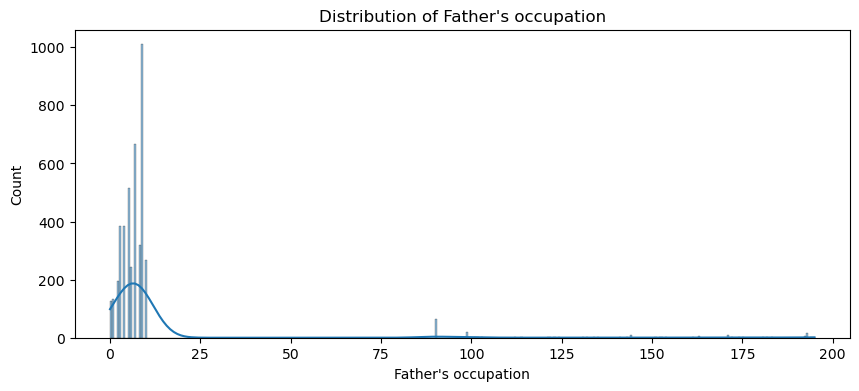

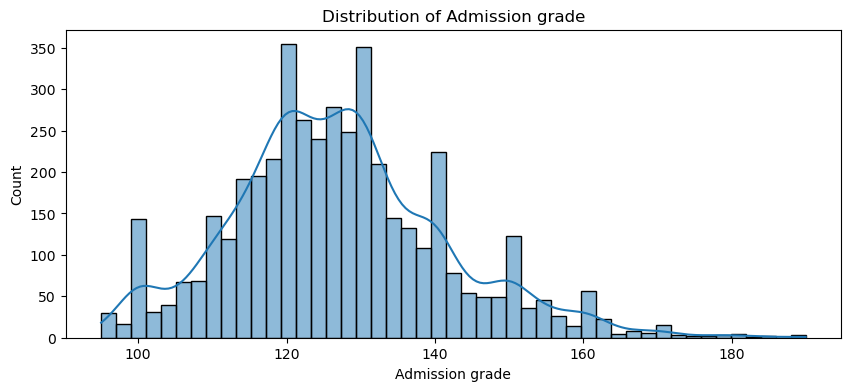

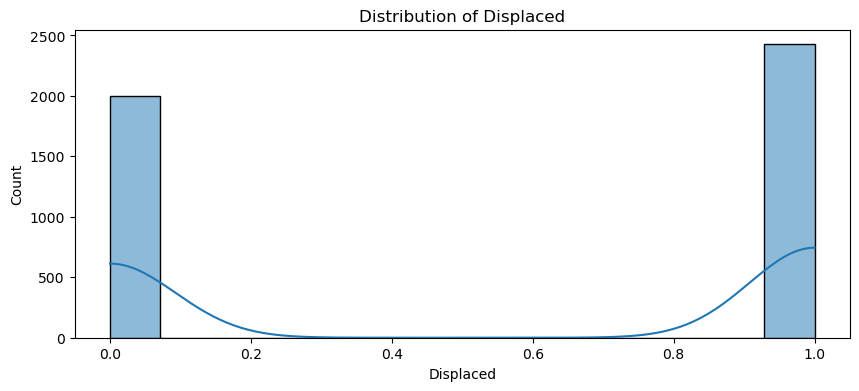

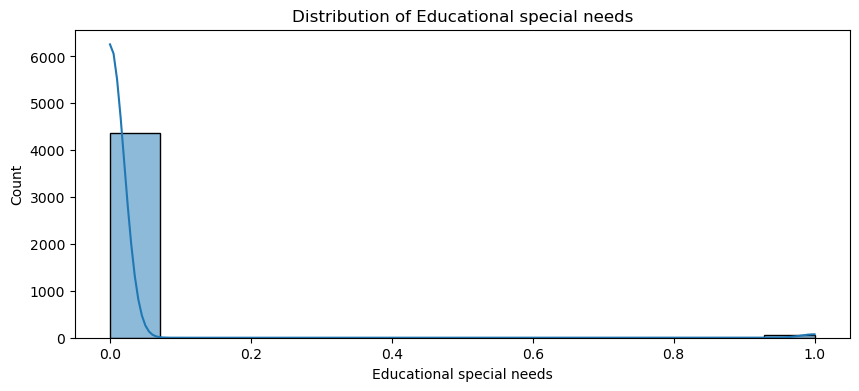

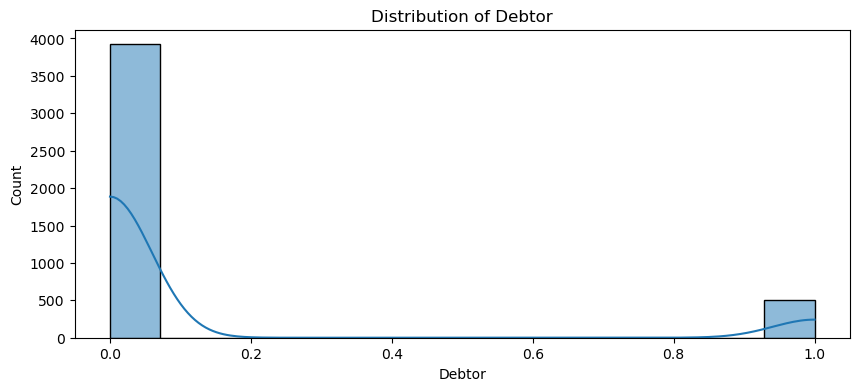

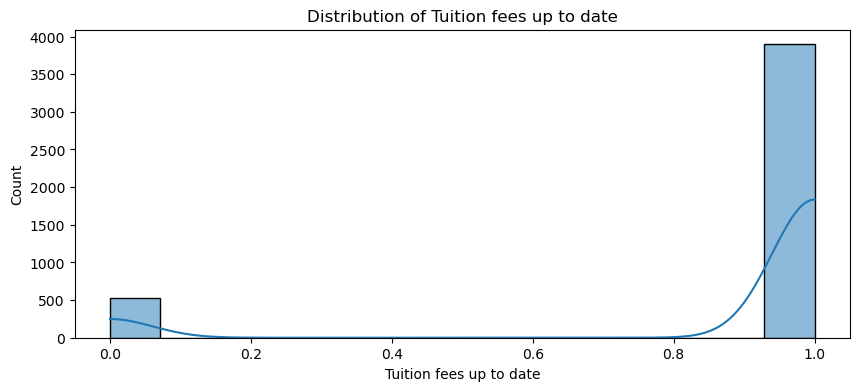

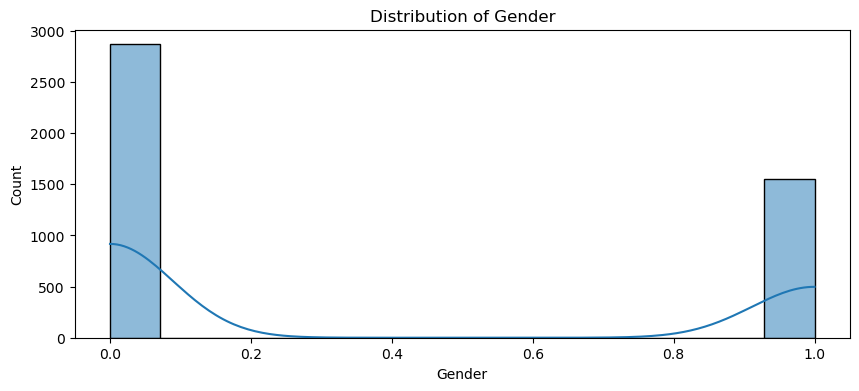

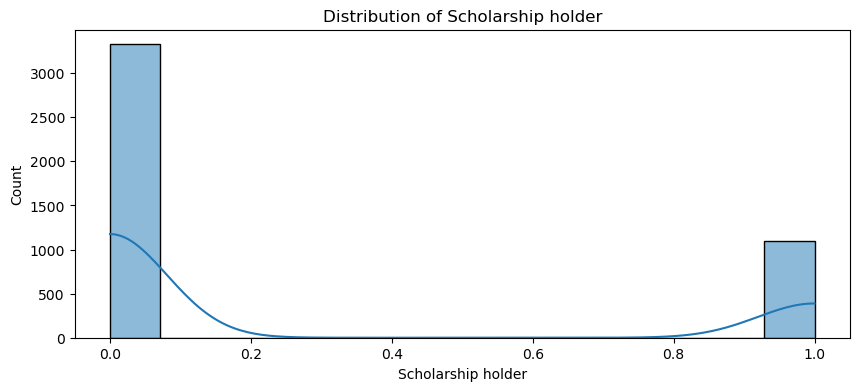

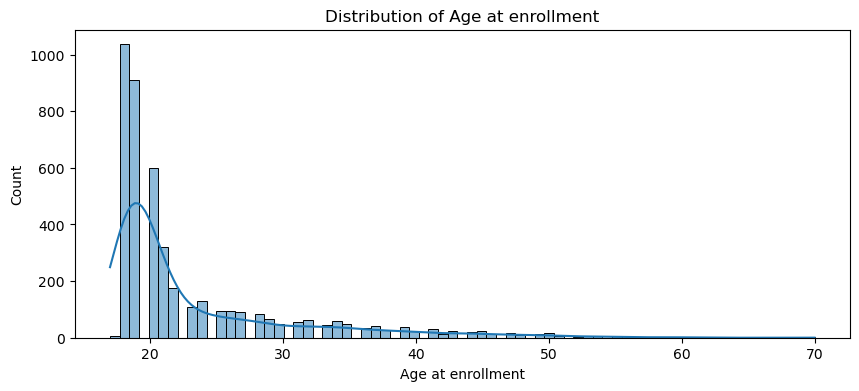

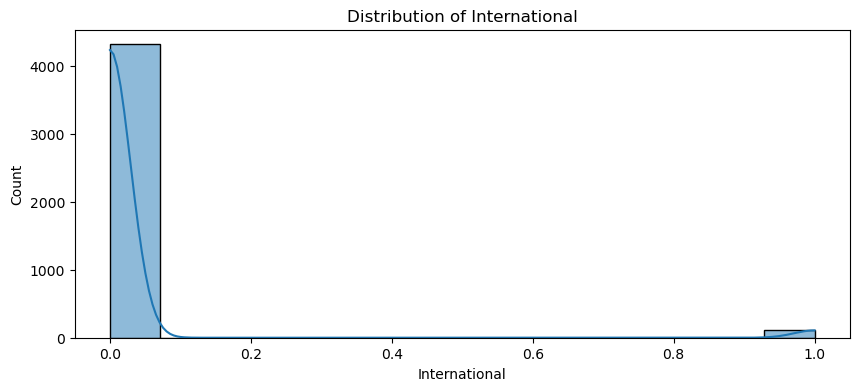

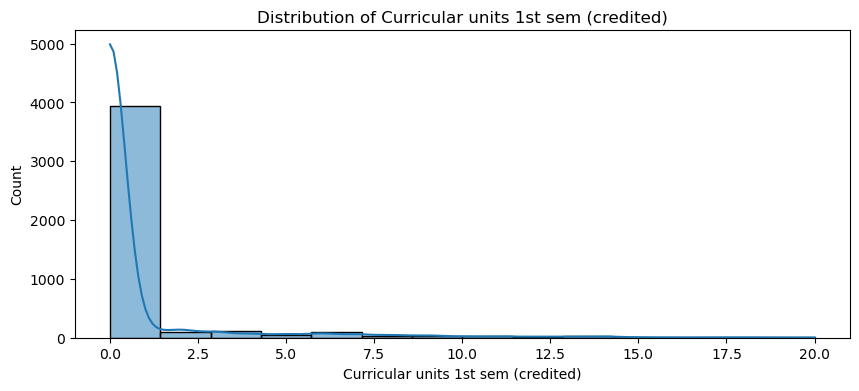

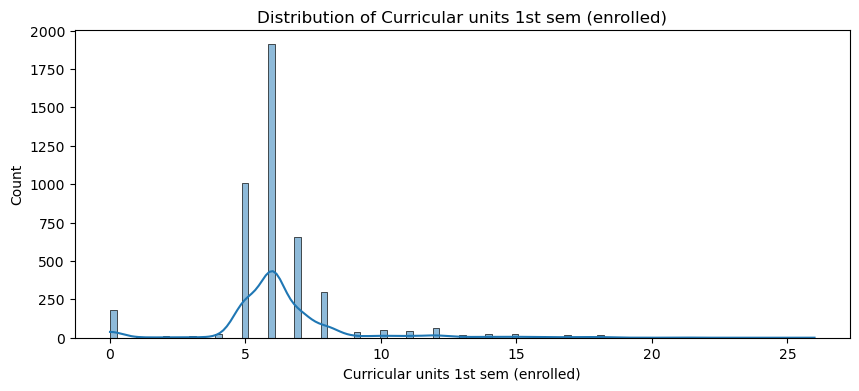

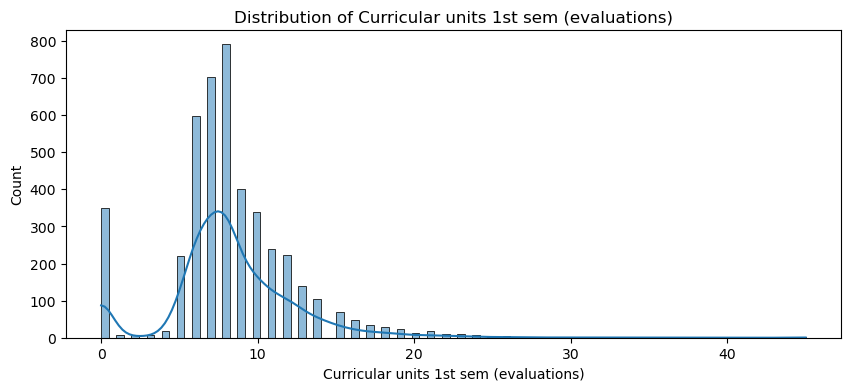

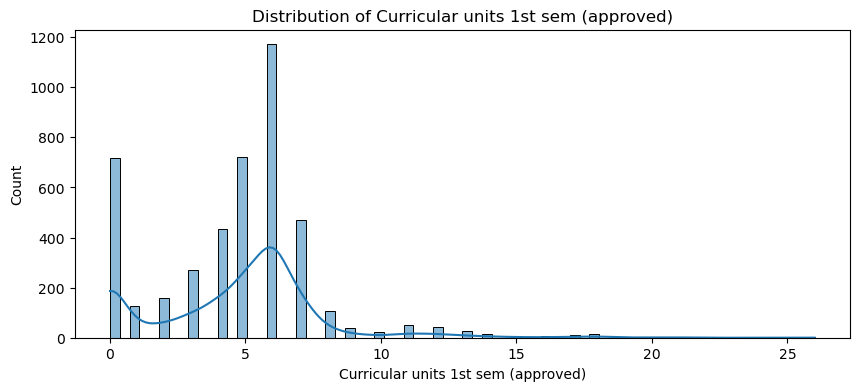

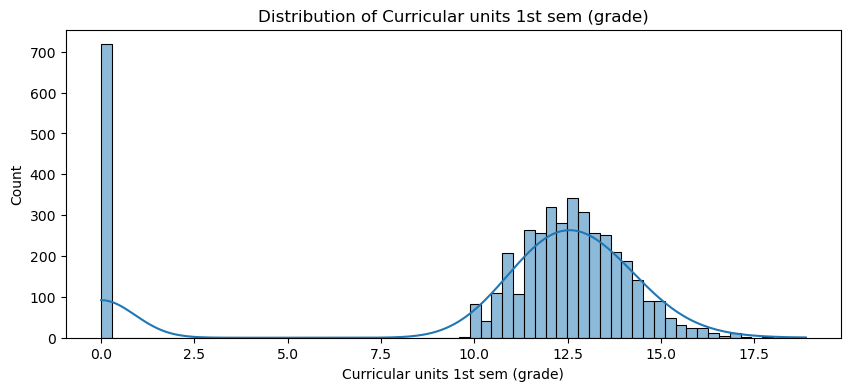

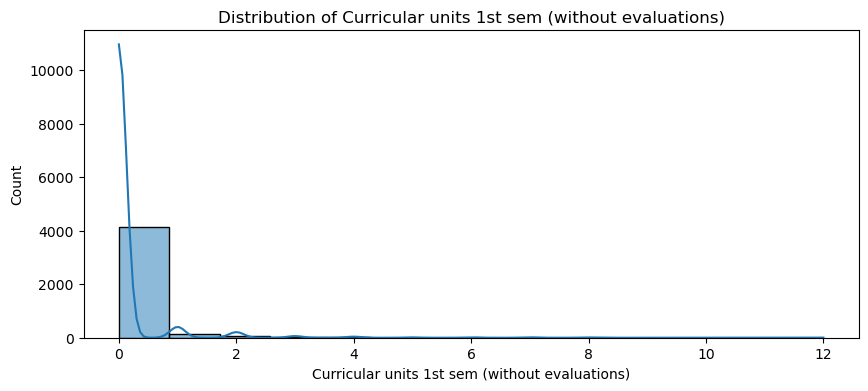

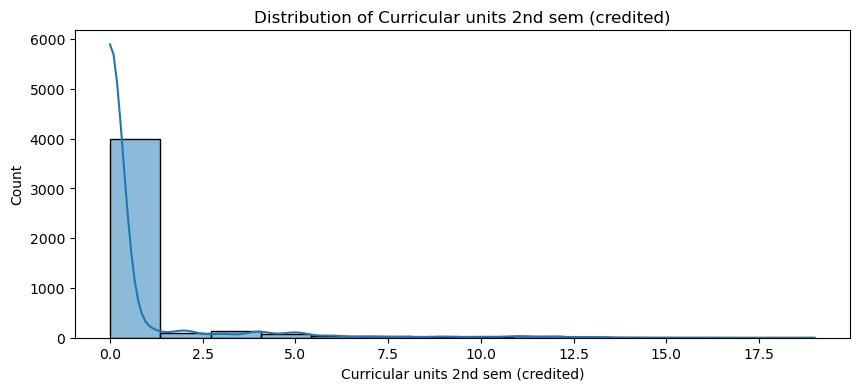

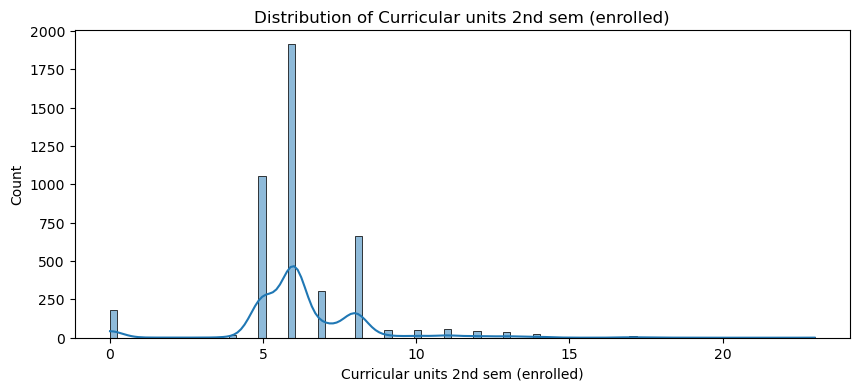

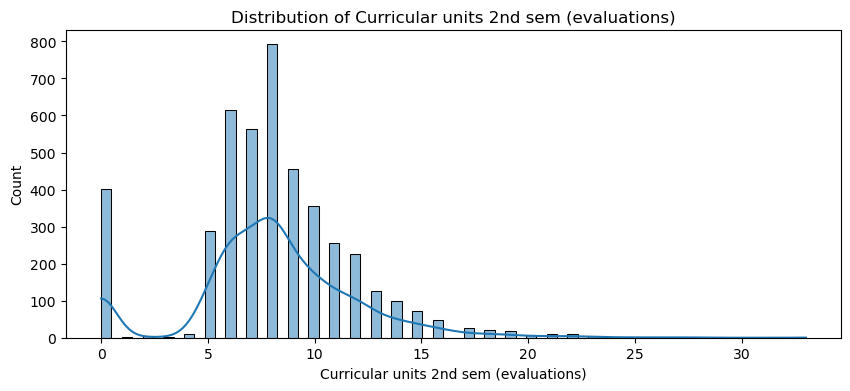

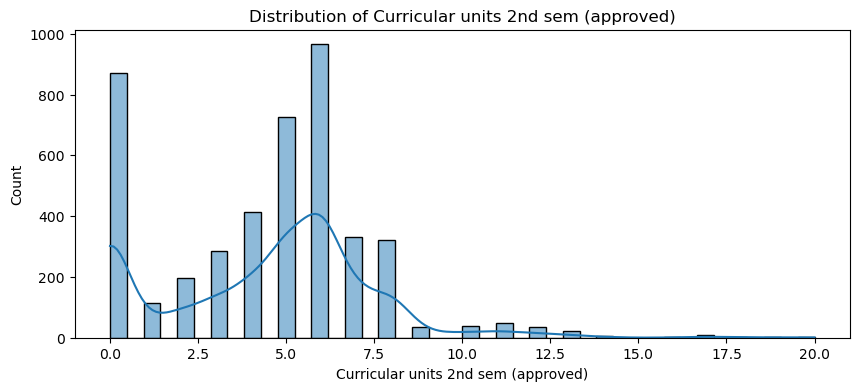

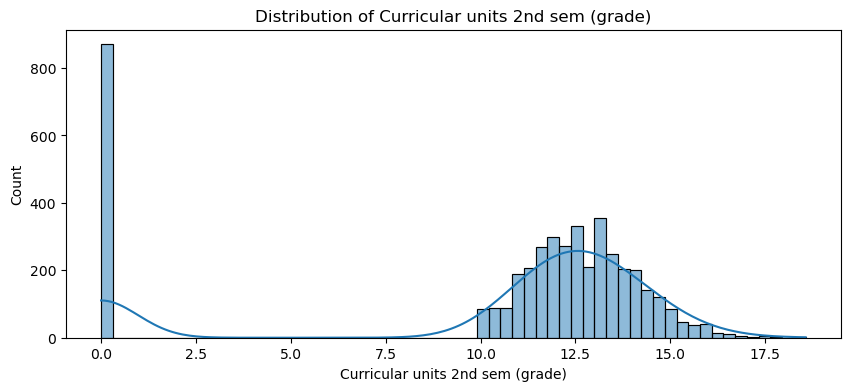

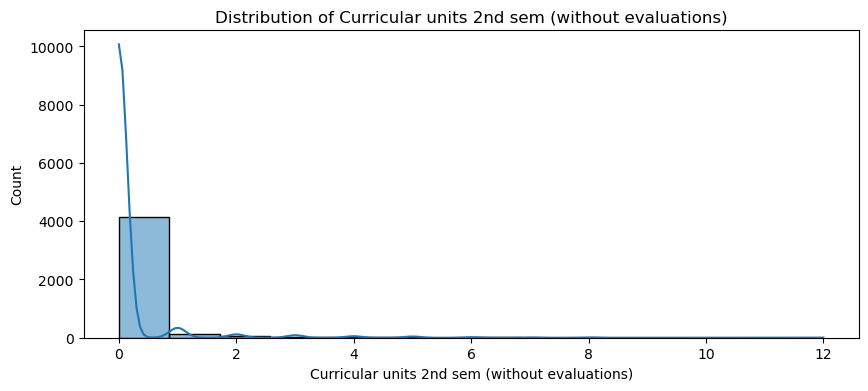

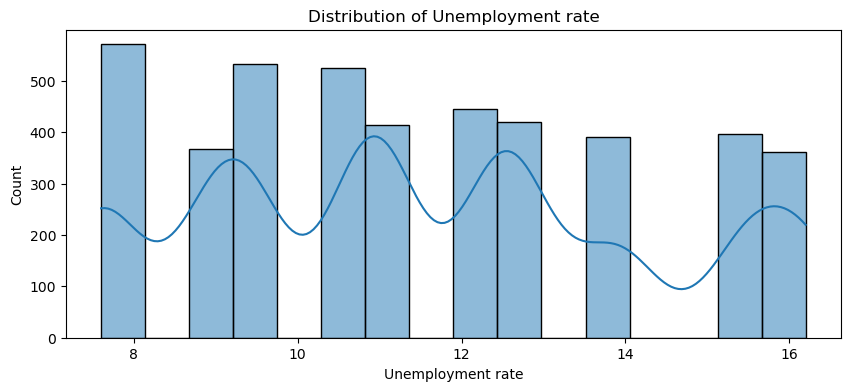

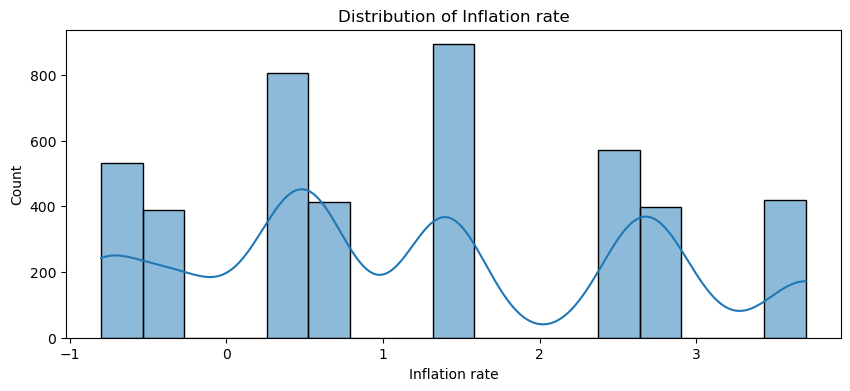

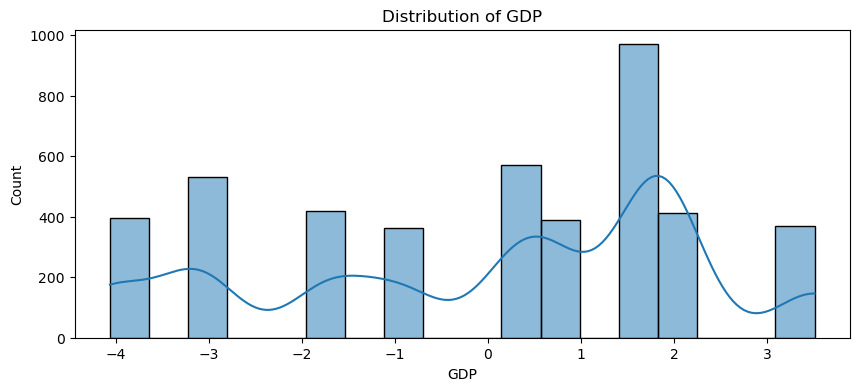

In [6]:
# Distribution of Numerical Features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    # plt.savefig(f'EDA_visualizations/distribution_{feature}.png')
    plt.show()

In [7]:
# Count Plots for Categorical Features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=X[feature])
    plt.title(f'Count Plot of {feature}')
    # plt.savefig(f'EDA_visualizations/countplot_{feature}.png')
    plt.show()

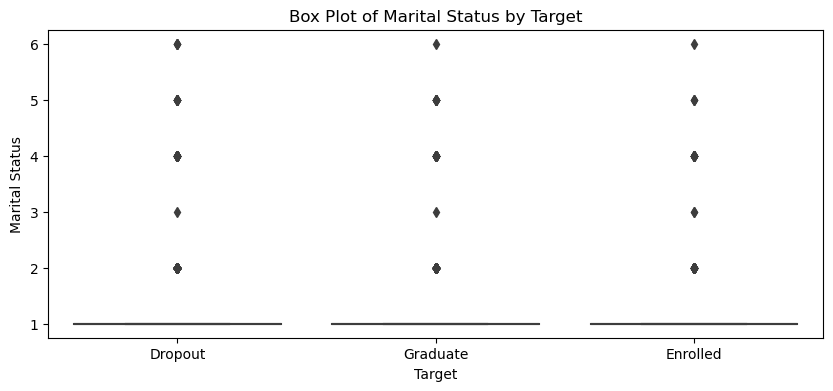

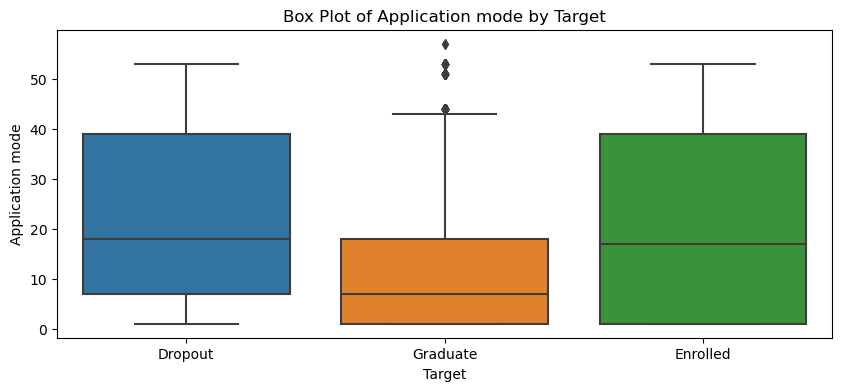

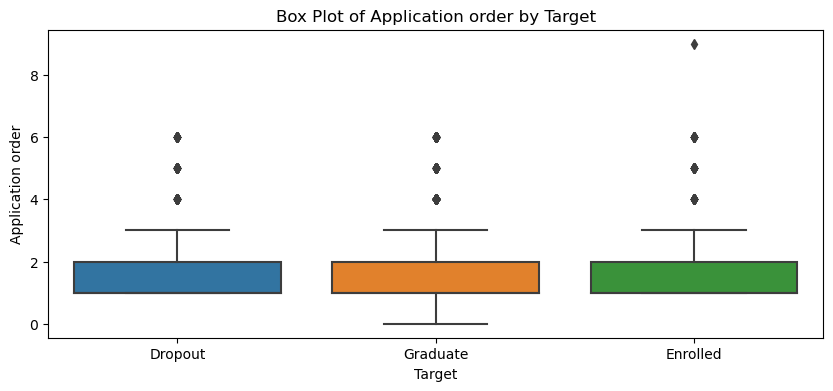

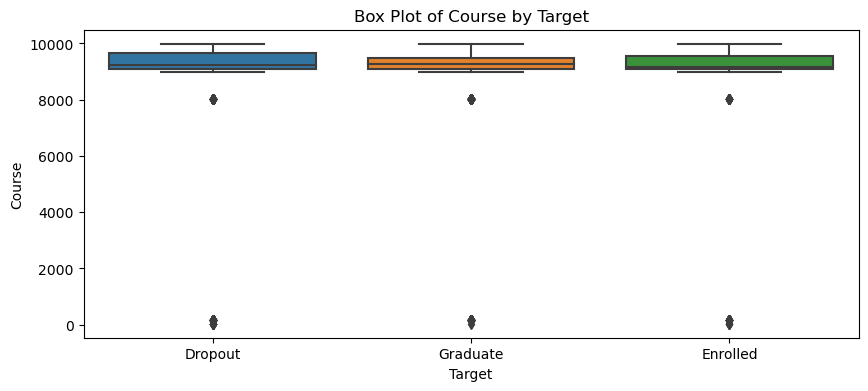

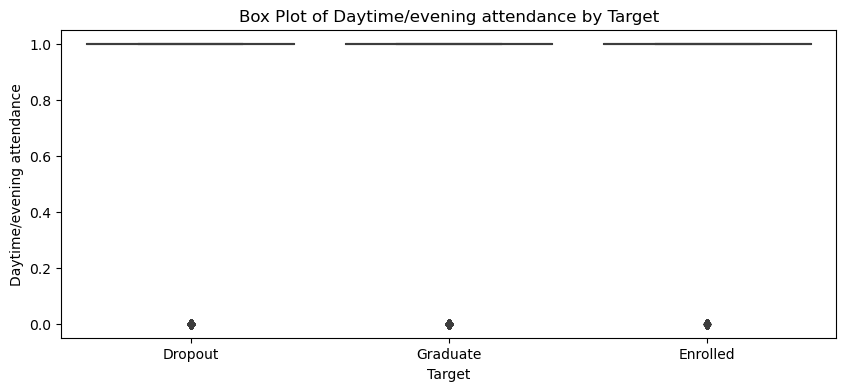

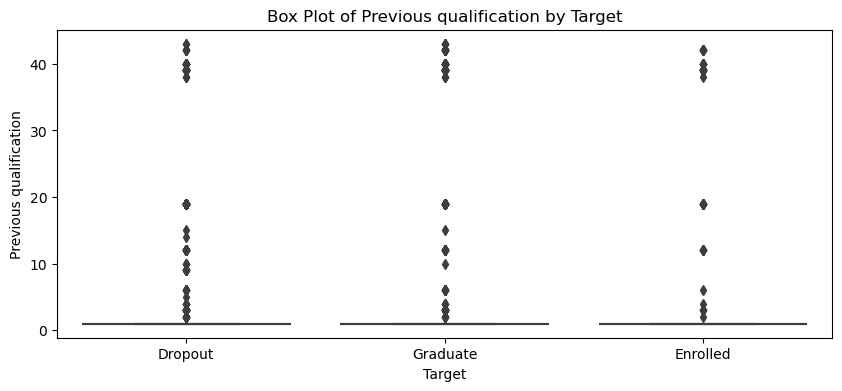

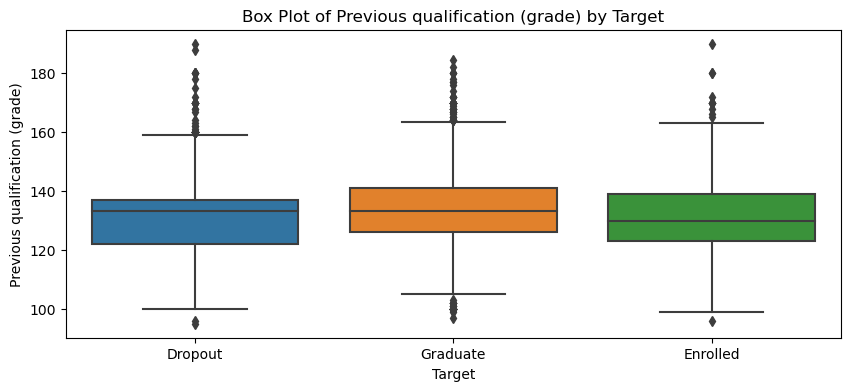

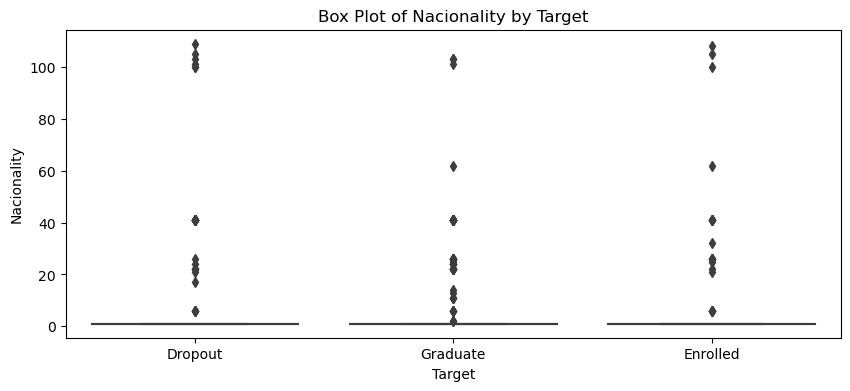

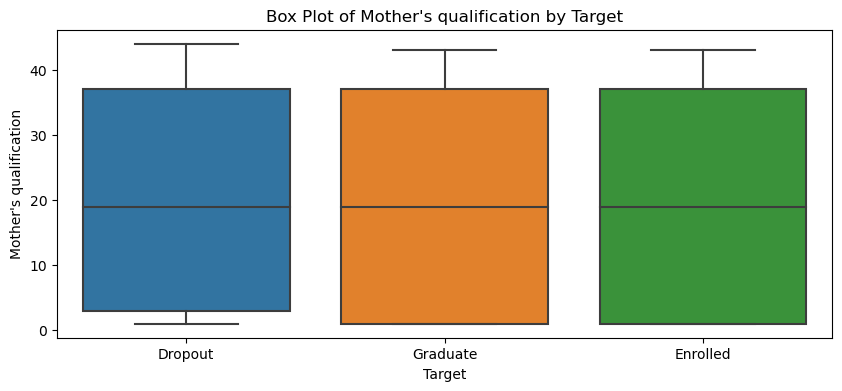

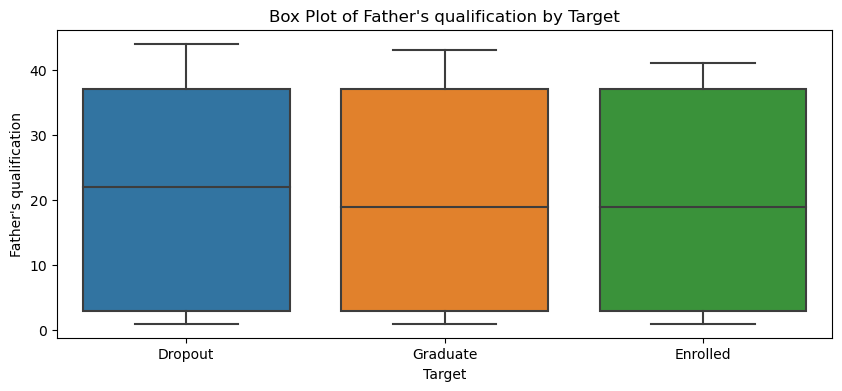

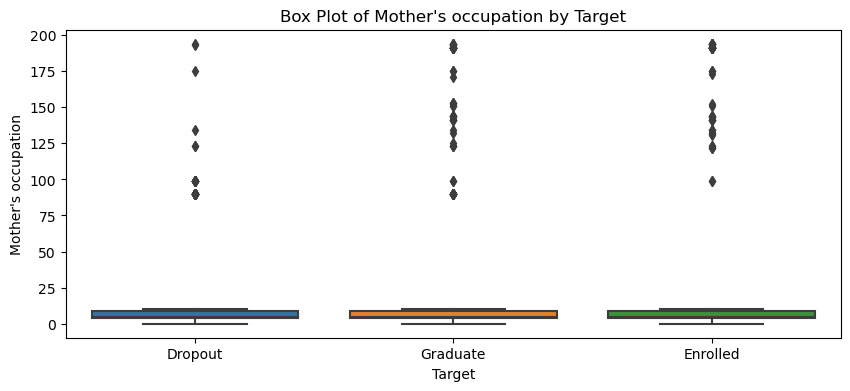

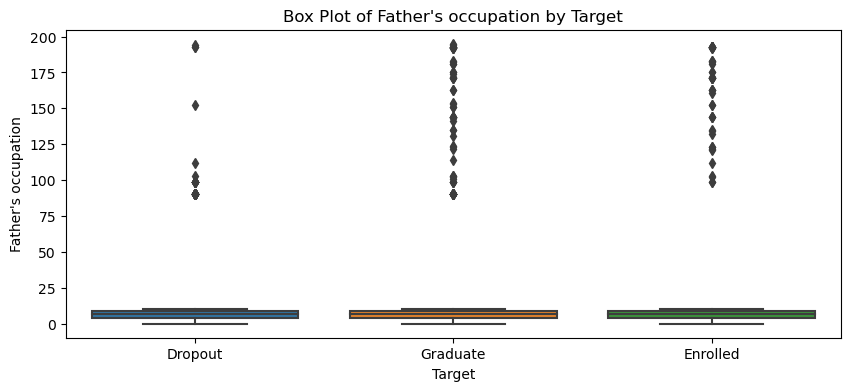

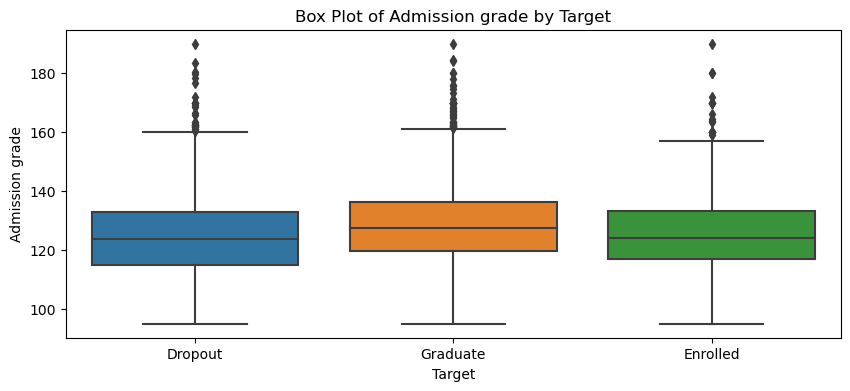

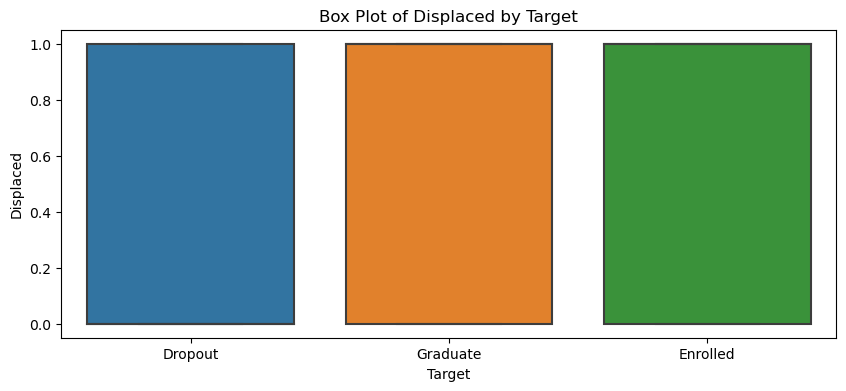

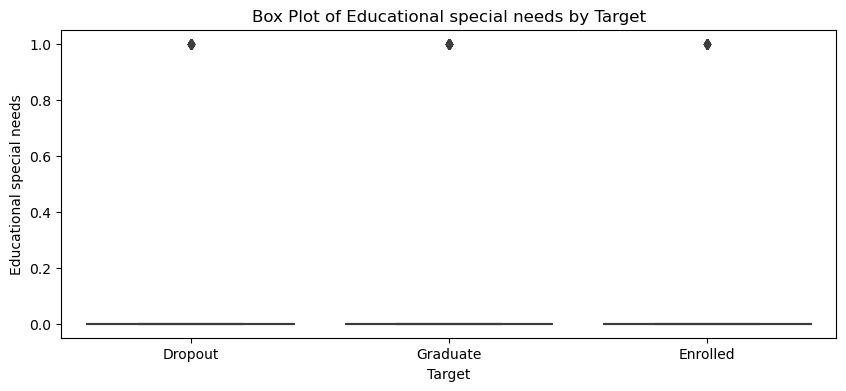

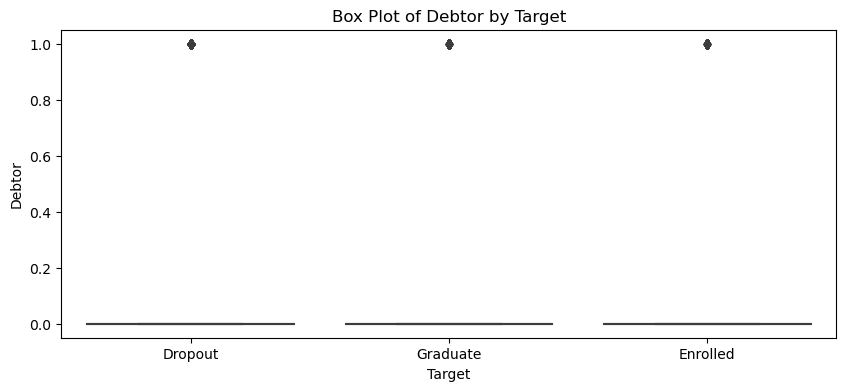

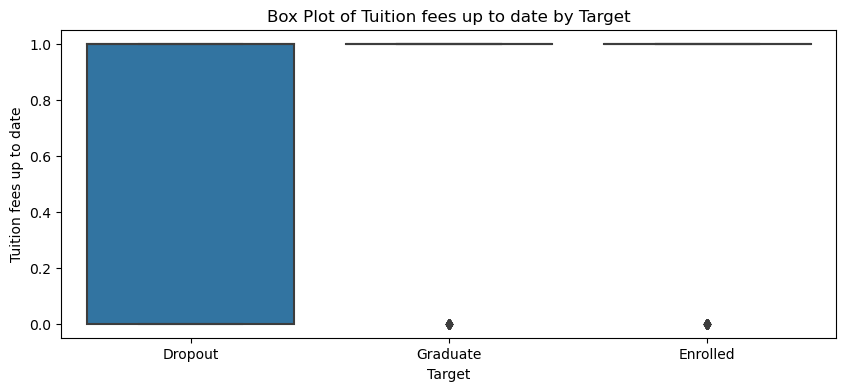

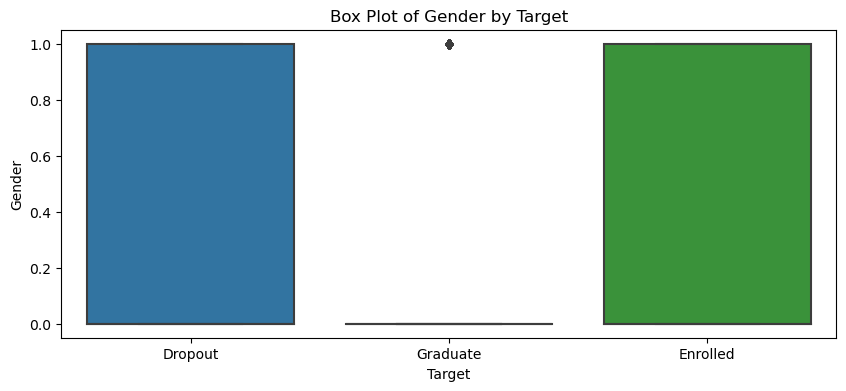

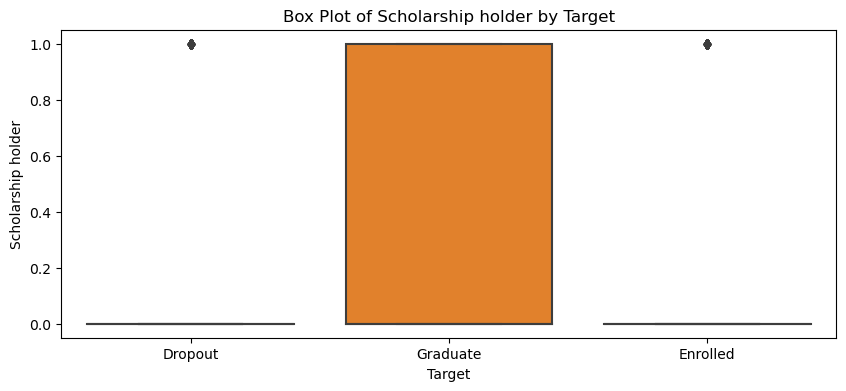

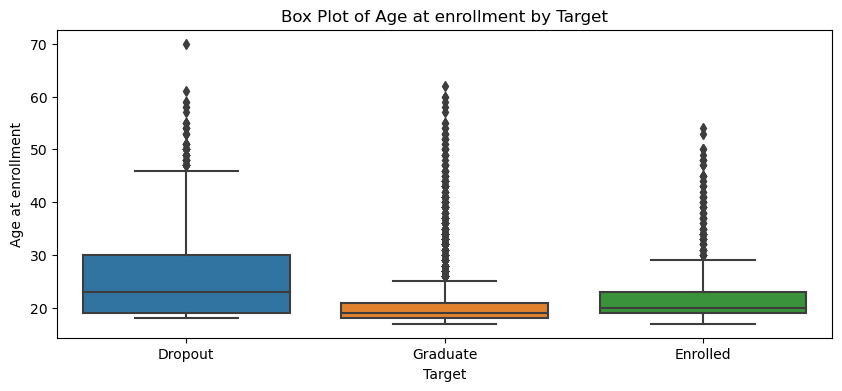

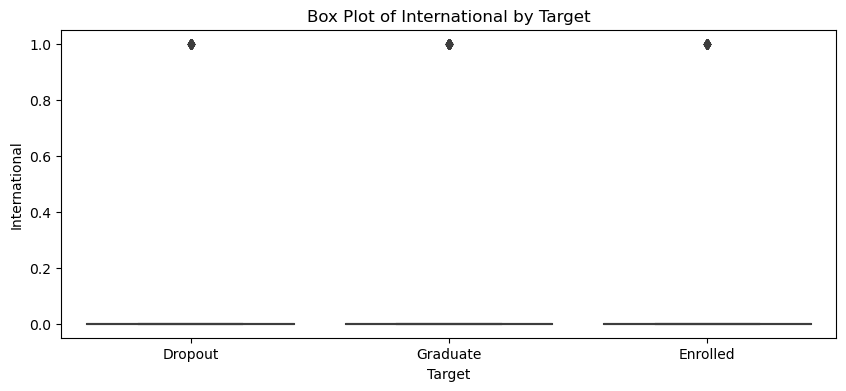

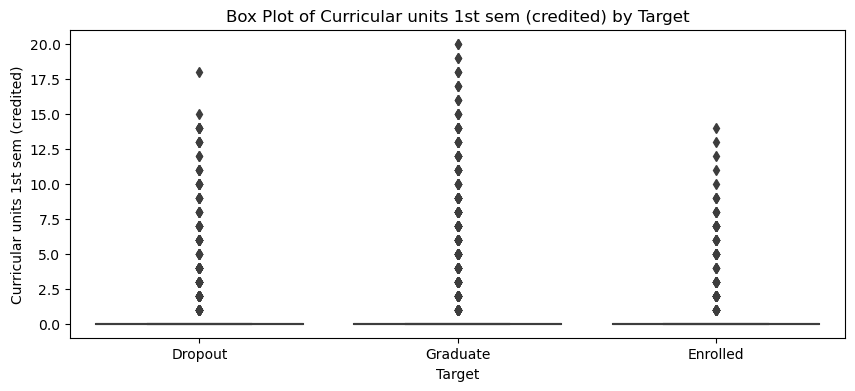

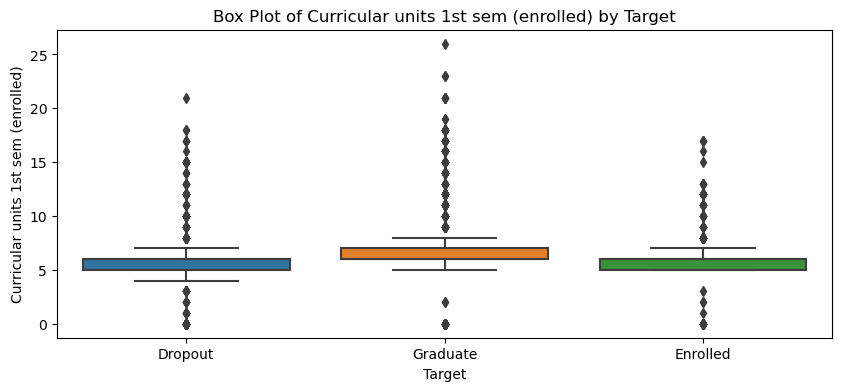

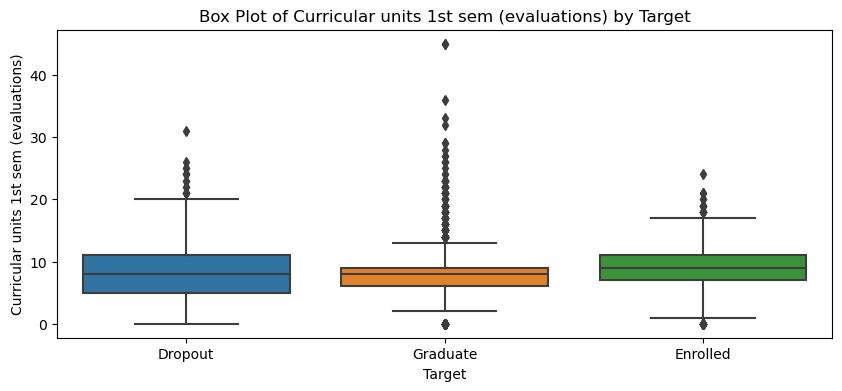

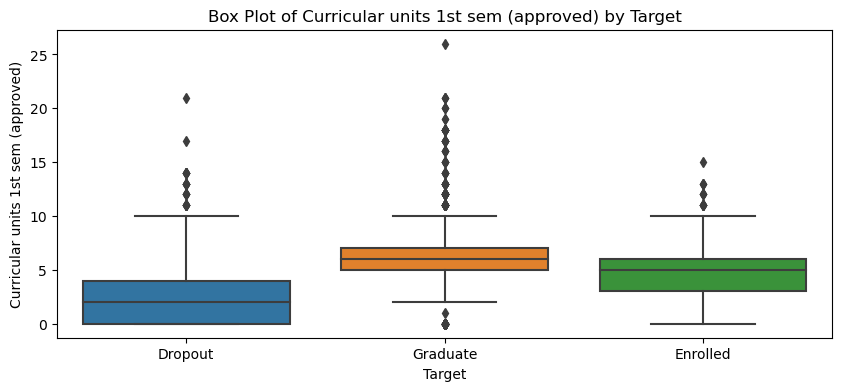

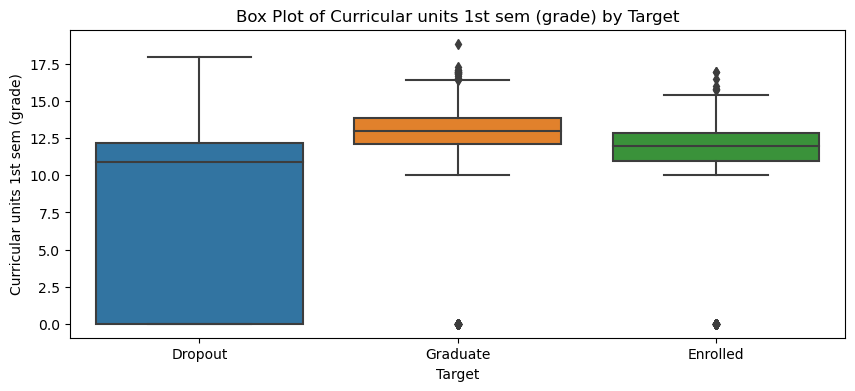

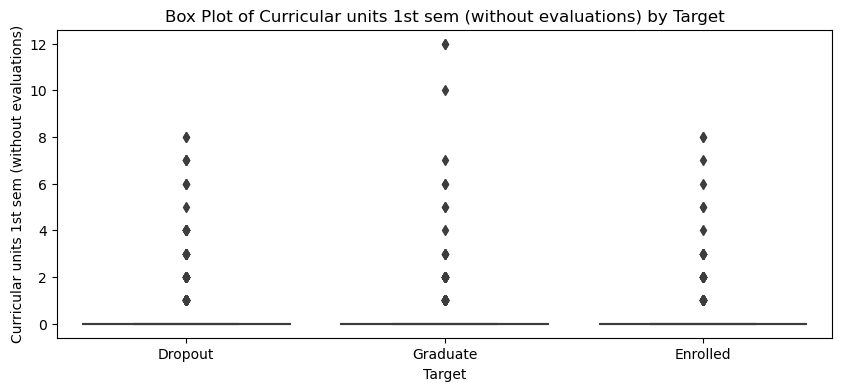

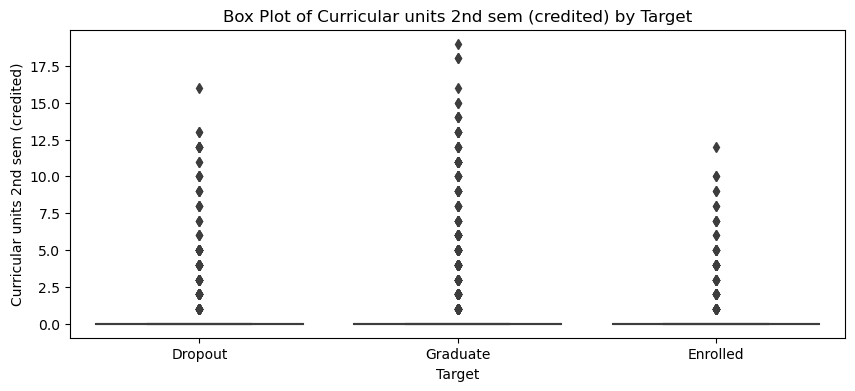

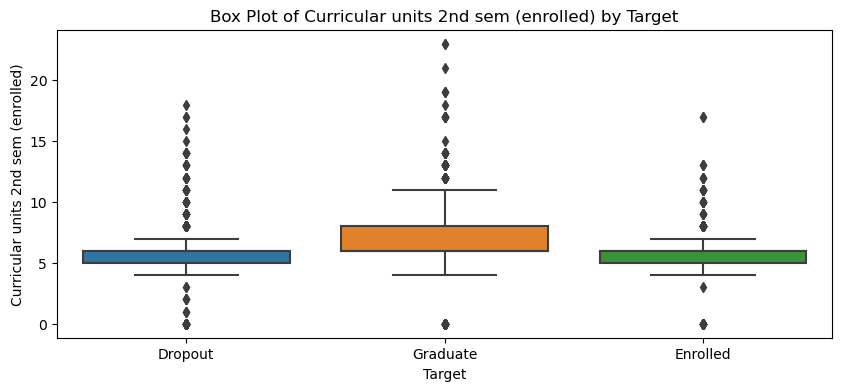

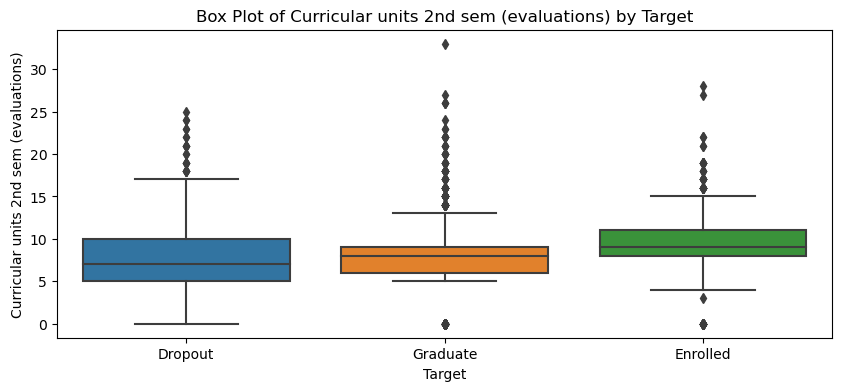

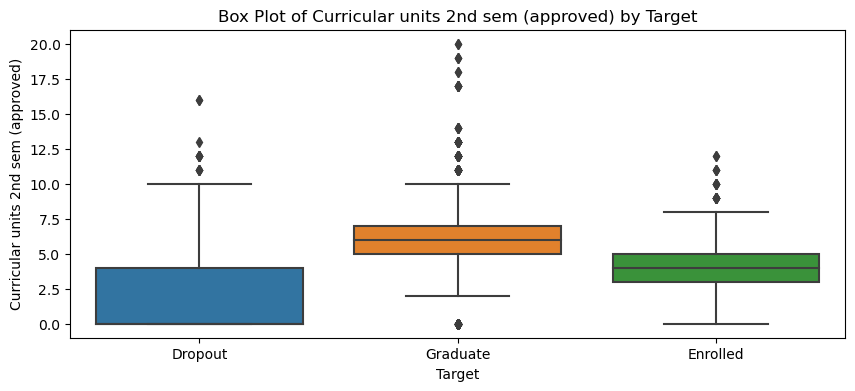

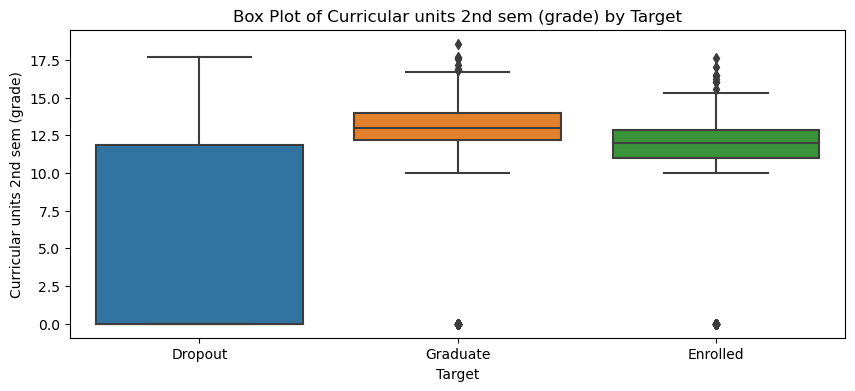

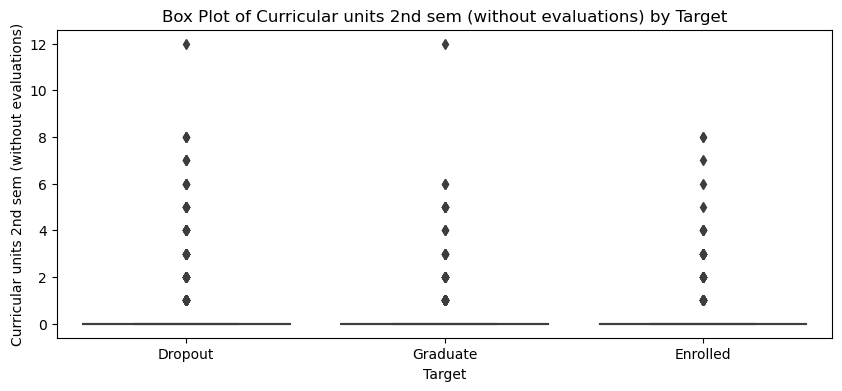

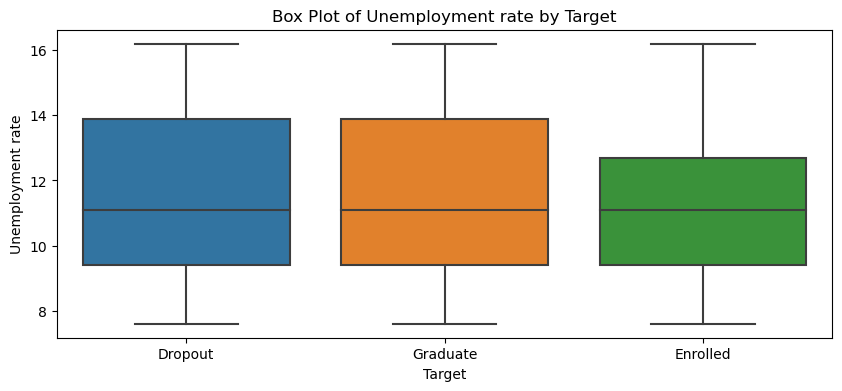

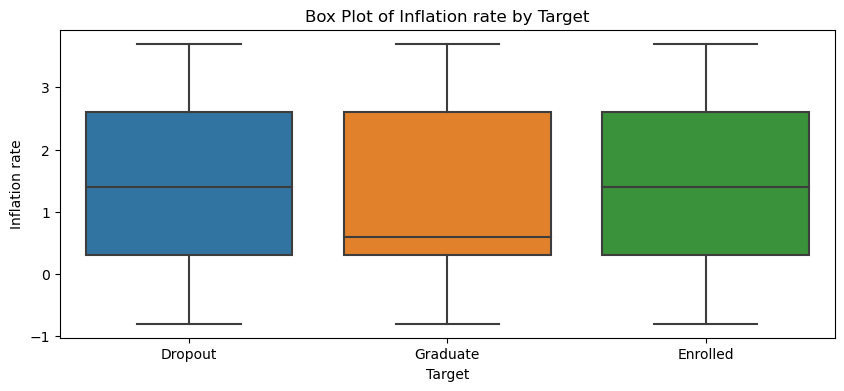

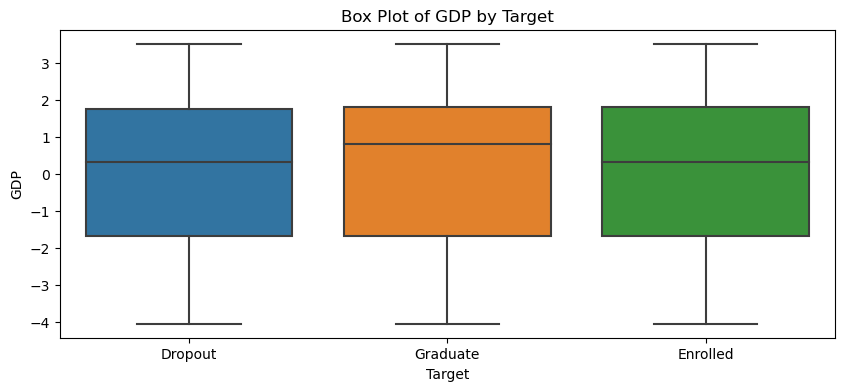

In [8]:
# Box Plots
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=y.squeeze(), y=X[feature])  # Using squeeze() to ensure y is 1D
    plt.title(f'Box Plot of {feature} by Target')
    # plt.savefig(f'EDA_visualizations/boxplot_{feature}.png')
    plt.show()

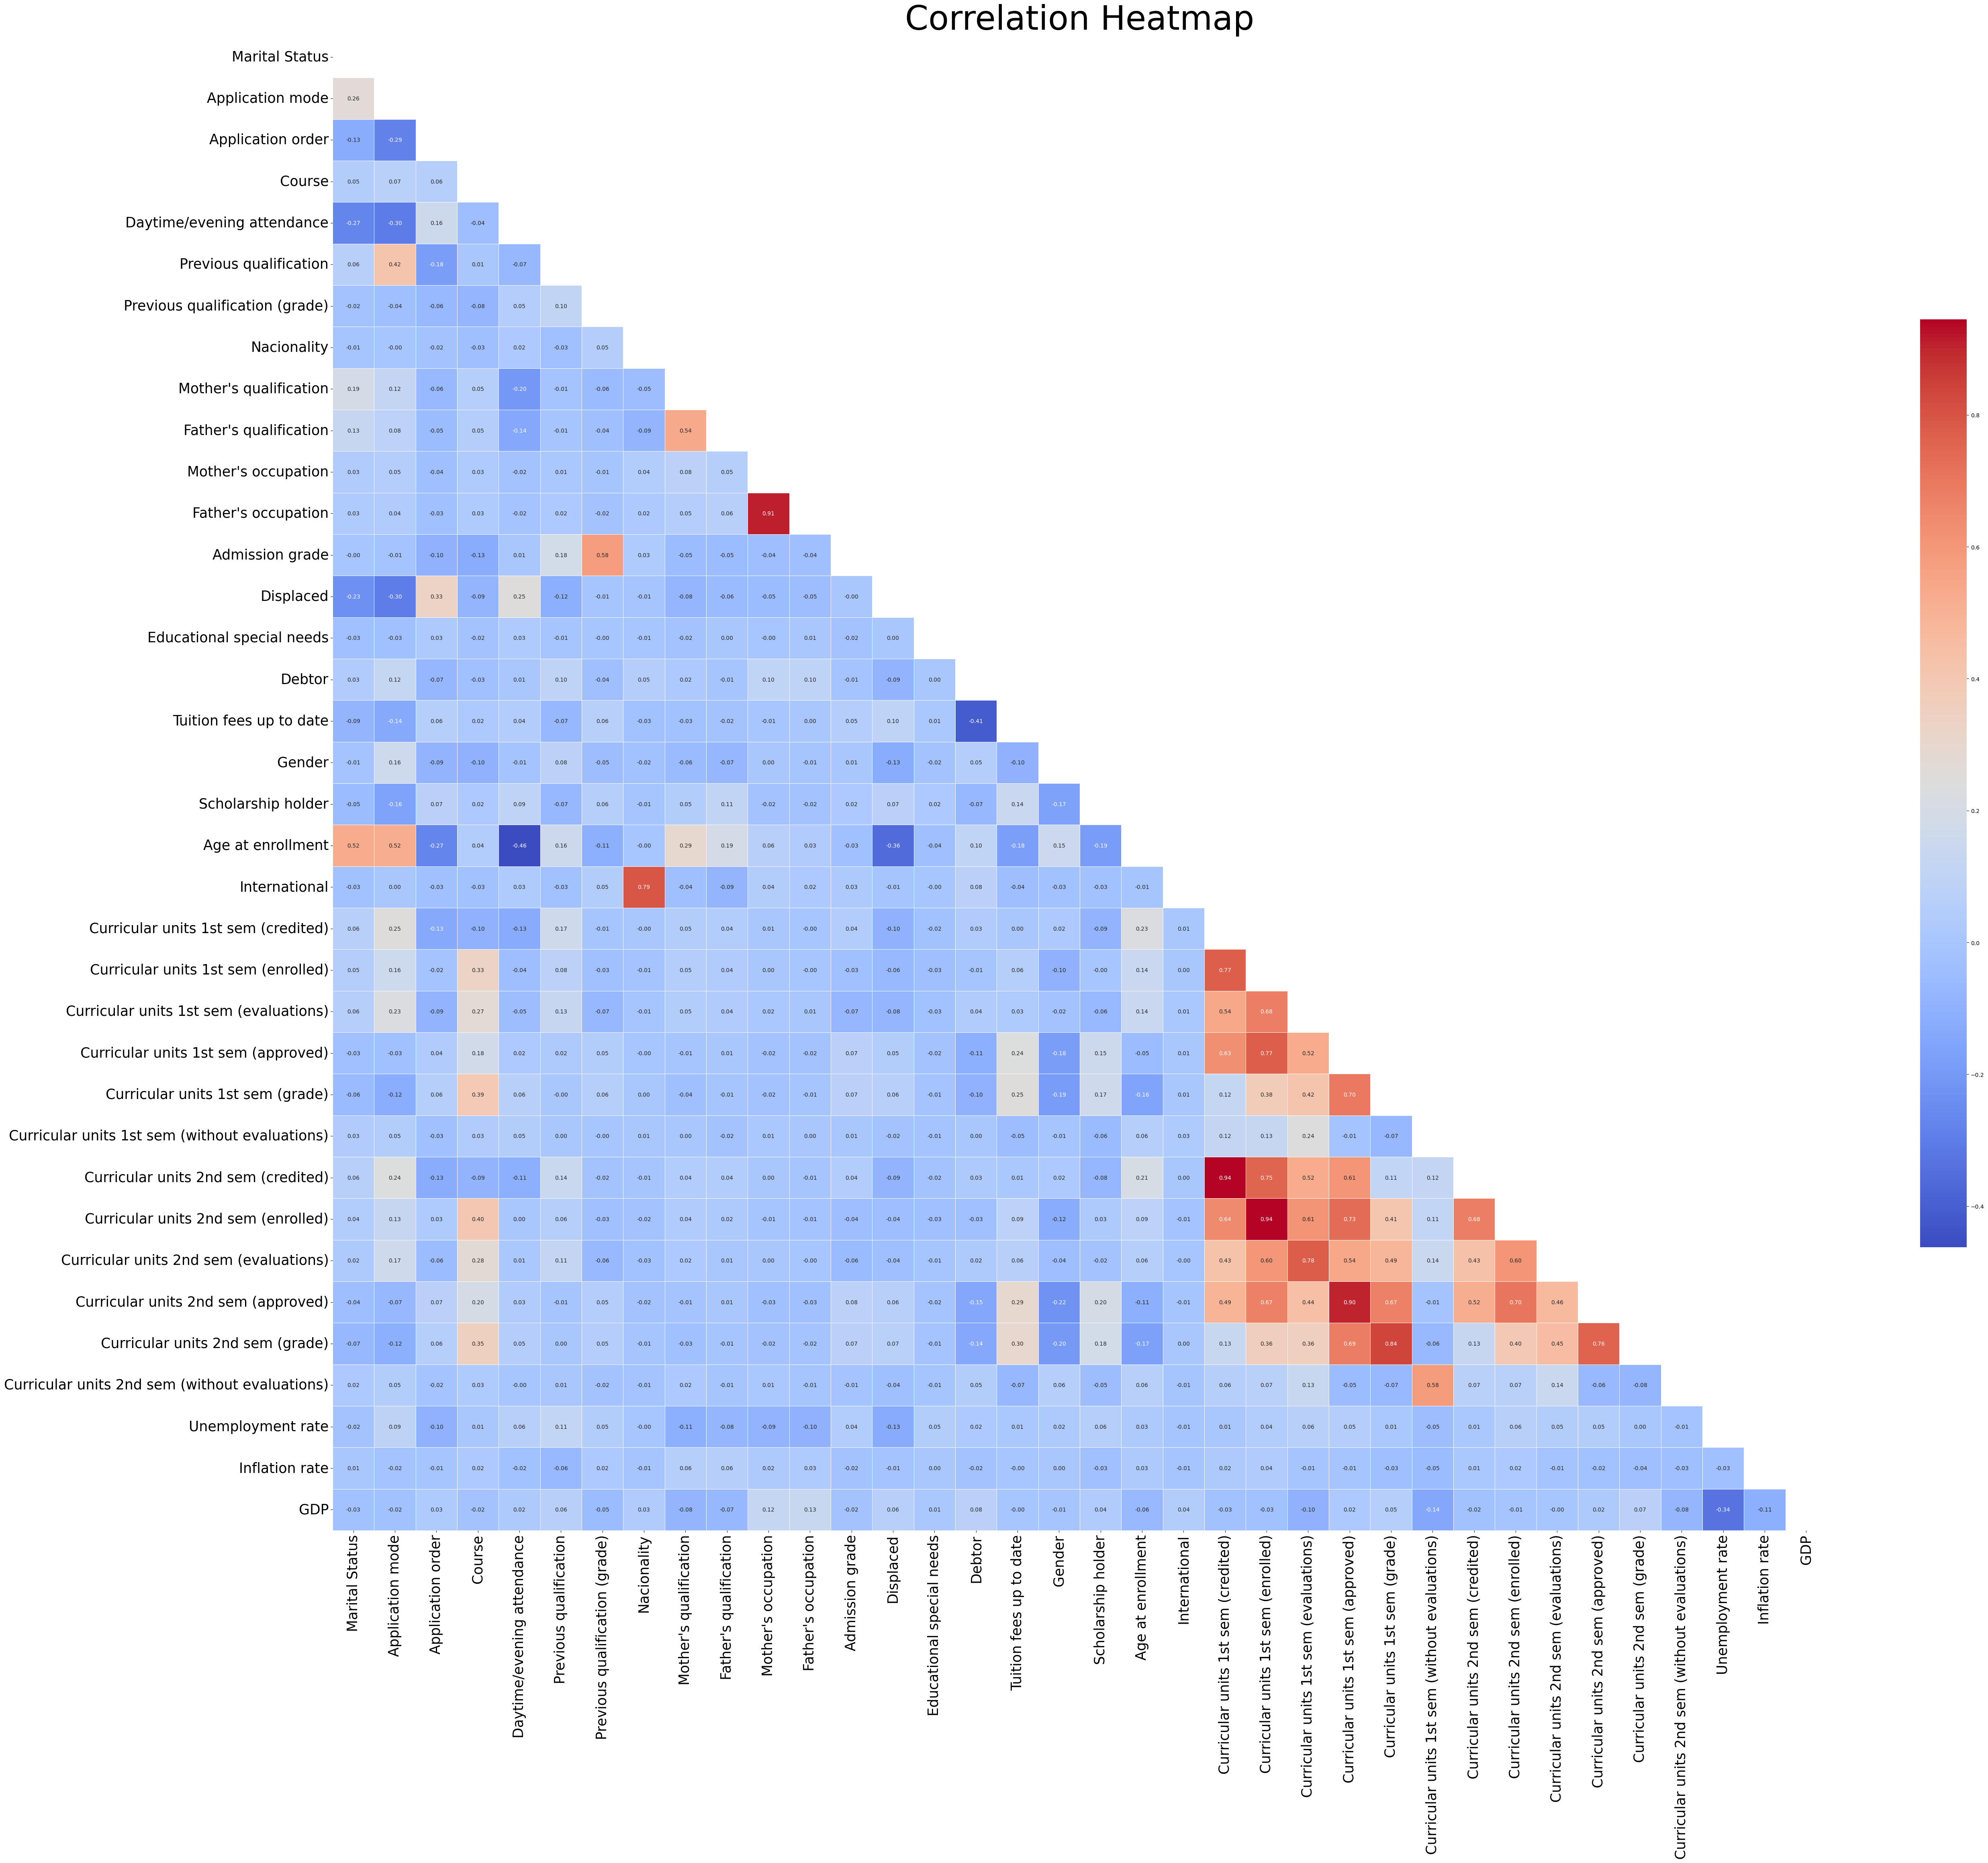

In [9]:
# Correlation Heatmap
plt.figure(figsize=(60, 60))
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Correlation Heatmap', fontsize=60)
plt.savefig('EDA_visualizations/correlation_heatmap.png')
plt.show()

In [10]:
print(corr)

                                                Marital Status  \
Marital Status                                        1.000000   
Application mode                                      0.264006   
Application order                                    -0.125854   
Course                                                0.046365   
Daytime/evening attendance                           -0.274939   
Previous qualification                                0.062529   
Previous qualification (grade)                       -0.022406   
Nacionality                                          -0.008843   
Mother's qualification                                0.193163   
Father's qualification                                0.130353   
Mother's occupation                                   0.034994   
Father's occupation                                   0.031609   
Admission grade                                      -0.004771   
Displaced                                            -0.234886   
Educationa

Original shapes:
X shape: (3, 16)
y shape: (4424, 1)

Shapes after encoding and adding target to X:
X shape: (3, 16)
y shape: (3, 1)
Debtor                                       1.000000e+00
Tuition fees up to date                     -1.000000e+00
Scholarship holder                           1.000000e+00
Financial Stability Index                   -1.000000e+00
Target                                       1.000000e+00
Normalized Previous qualification (grade)   -8.660254e-01
Previous qualification (grade)              -8.660254e-01
Age at enrollment                           -1.013606e-01
1st and 2nd sem approved interaction        -8.219949e-02
Approval rate 2nd sem                       -2.083210e-16
Curricular units 1st sem (approved)         -4.807407e-17
Curricular units 2nd sem (approved)         -4.807407e-17
Approval rate 1st sem                        3.204938e-17
Curricular units 1st sem (enrolled)                   NaN
Curricular units 2nd sem (enrolled)                   N

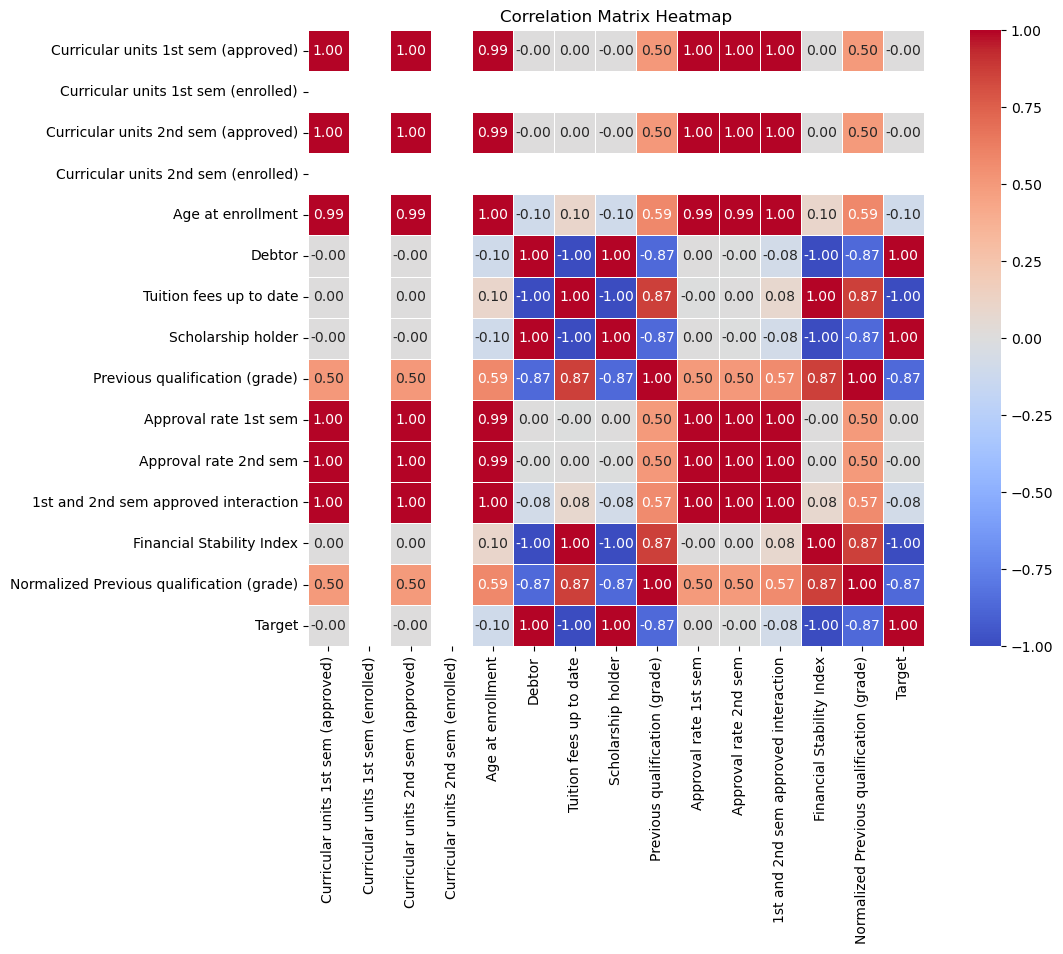

In [27]:
from sklearn.preprocessing import LabelEncoder

# Assuming X and y are already defined with shapes (3, 15) and (4424, 1) respectively
print("Original shapes:")
print("X shape:", X.shape)
print("y shape:", y.shape)

# Truncate y to match the number of samples in X
y_truncated = y.iloc[0:3]

# Reshape y_truncated to a 1D array
y_reshaped = y_truncated.values.ravel()

# Encode the truncated target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_reshaped)

# Add the encoded target as a new column in X
X['Target'] = y_encoded

print("\nShapes after encoding and adding target to X:")
print("X shape:", X.shape)
print("y shape:", y_truncated.shape)

# Exclude non-numeric columns
X_numeric = X.select_dtypes(include=[np.number])

# Add the encoded target column to the numeric DataFrame
X_numeric['Target'] = y_encoded

# Compute the correlation matrix
correlation_matrix = X_numeric.corr()

# Extract and sort the correlations with the target
target_correlations = correlation_matrix['Target']
sorted_target_correlations = target_correlations.sort_values(key=abs, ascending=False)

# Print the sorted correlations
print(sorted_target_correlations)
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

# Drop the target column after computing correlations
X_numeric.drop('Target', axis=1, inplace=True)




## Correlation Analysis with Target Variable

The correlation analysis between feature variables and the target variable revealed several significant relationships:

### Strong Positive Correlations
- `Curricular units 2nd sem (approved)`: Positive correlation (r = 0.624157) suggests a strong relationship where students with a higher number of approved curricular units in the second semester are more likely to have a positive outcome.
- `Curricular units 2nd sem (grade)`: Positive correlation (r = 0.566827) indicates that students with higher grades in the second semester are more likely to have a positive outcome.
- `Curricular units 1st sem (approved)`: Positive correlation (r = 0.529123) also points to a similar trend as with second-semester approvals.
- `Curricular units 1st sem (grade)`: Positive correlation (r = 0.485207) demonstrates the importance of first-semester grades in predicting the target variable.

### Strong Negative Correlations
- `Age at enrollment`: Negative correlation (r = -0.243438) suggests that older students at the time of enrollment may have a lower likelihood of a positive outcome.
- `Debtor`: Negative correlation (r = -0.240999) indicates that students with outstanding debts are less likely to achieve a positive outcome.
- `Gender`: Negative correlation (r = -0.229270) may reflect that the gender of students could have an impact on the target variable, with the coding of gender needing clarification for interpretation.
- `Application mode`: Negative correlation (r = -0.221747) suggests that the mode of application could influence student outcomes.

### Other Notable Correlations
- `Tuition fees up to date`: Positive correlation (r = 0.409827) implies that students who are current with their tuition payments are more likely to have a positive outcome.
- `Scholarship holder`: Positive correlation (r = 0.297595) suggests that receiving a scholarship is associated with a positive outcome.

### Minimal or No Correlation
Several features showed minimal or no linear correlation with the target variable, indicating that they might not be significant predictors in the context of the other features.

These results highlight the importance of academic performance indicators such as curricular unit approvals and grades in predicting student success. Financial factors such as being a debtor or staying current with tuition fees also play a significant role. Demographic and enrollment characteristics such as age, gender, and application mode require further investigation to understand their impact on student outcomes.


# DONE WITH EDA FOR NOW
---

# Feature Engineering

In [16]:
data = {
    'Curricular units 1st sem (approved)': [3, 4, 5],
    'Curricular units 1st sem (enrolled)': [5, 5, 5],
    'Curricular units 2nd sem (approved)': [2, 3, 4],
    'Curricular units 2nd sem (enrolled)': [5, 5, 5],
    'Age at enrollment': [18, 25, 35],
    'Debtor': [0, 1, 0],
    'Tuition fees up to date': [1, 0, 1],
    'Scholarship holder': [0, 1, 0],
    'Previous qualification (grade)': [150, 120, 180]
}
X = pd.DataFrame(data)

# Ratio features
X['Approval rate 1st sem'] = X['Curricular units 1st sem (approved)'] / X['Curricular units 1st sem (enrolled)']
X['Approval rate 2nd sem'] = X['Curricular units 2nd sem (approved)'] / X['Curricular units 2nd sem (enrolled)']

# Binned age groups
X['Binned age'] = pd.cut(X['Age at enrollment'], bins=[0, 20, 30, 40, float('inf')], labels=['Under 20', '20-30', '31-40', 'Over 40'])

# Interaction features
X['1st and 2nd sem approved interaction'] = X['Curricular units 1st sem (approved)'] * X['Curricular units 2nd sem (approved)']

# Financial Stability Index
X['Financial Stability Index'] = X['Tuition fees up to date'] - X['Debtor'] + X['Scholarship holder']

# Normalized previous qualification grade
max_grade = X['Previous qualification (grade)'].max()
X['Normalized Previous qualification (grade)'] = X['Previous qualification (grade)'] / max_grade

In [17]:
# Create the directory if it doesn't exist
if not os.path.exists('EDA_visualizations_w_Feature_Engineering'):
    os.makedirs('EDA_visualizations_w_Feature_Engineering')

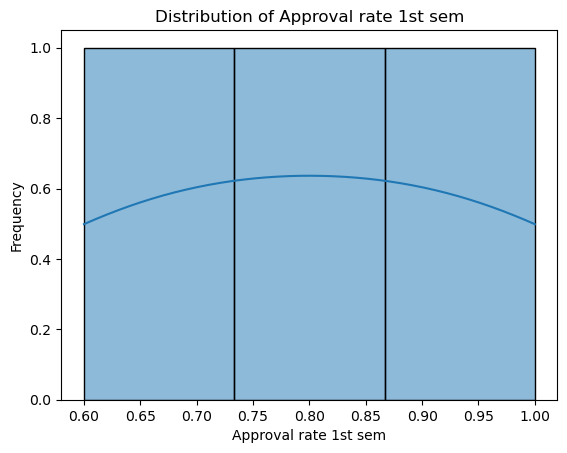

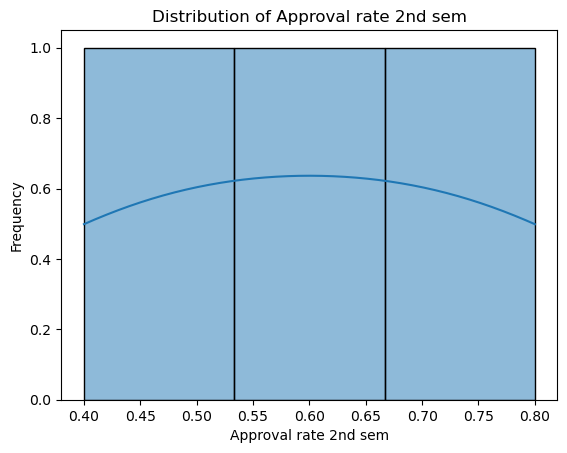

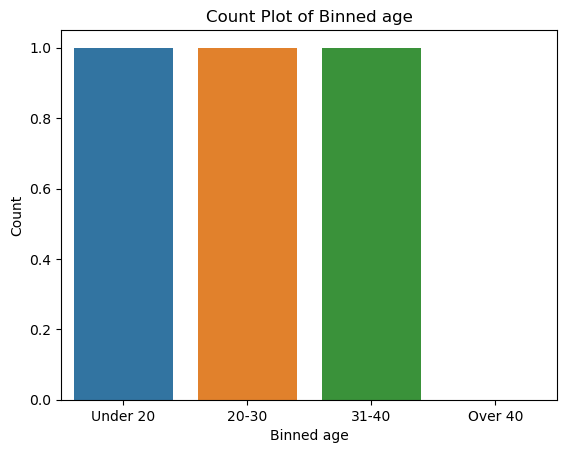

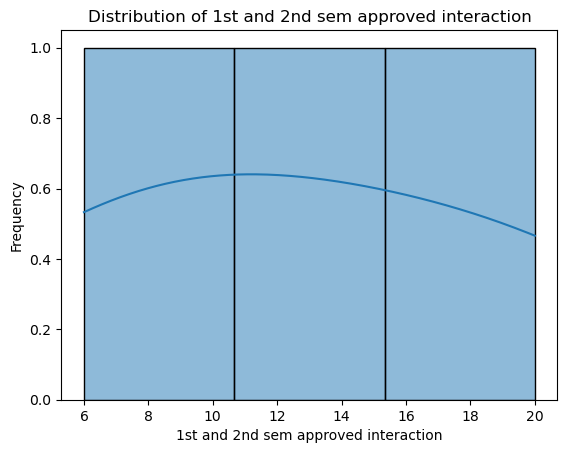

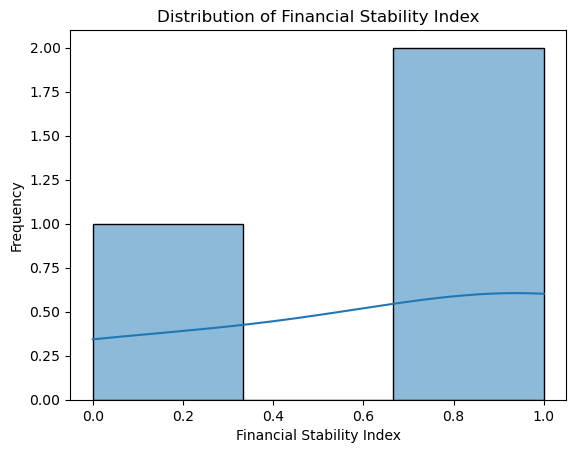

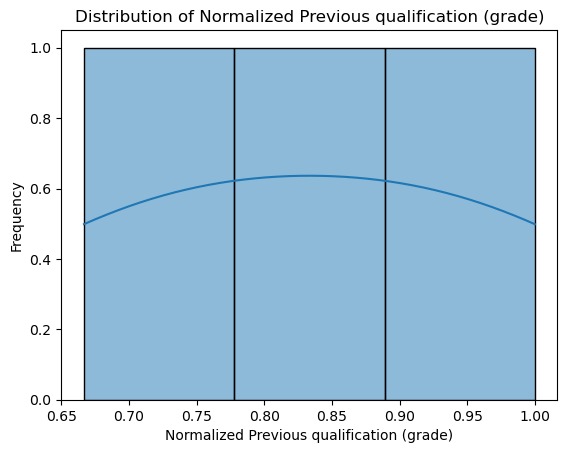

Correlation with Target:
 Binned age_20-30                             1.000000e+00
0                                            1.000000e+00
Approval rate 1st sem                        3.204938e-17
Approval rate 2nd sem                       -2.083210e-16
1st and 2nd sem approved interaction        -8.219949e-02
Binned age_Under 20                         -5.000000e-01
Binned age_31-40                            -5.000000e-01
Normalized Previous qualification (grade)   -8.660254e-01
Financial Stability Index                   -1.000000e+00
Binned age_Over 40                                    NaN
Name: 0, dtype: float64


/Users/abraar/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


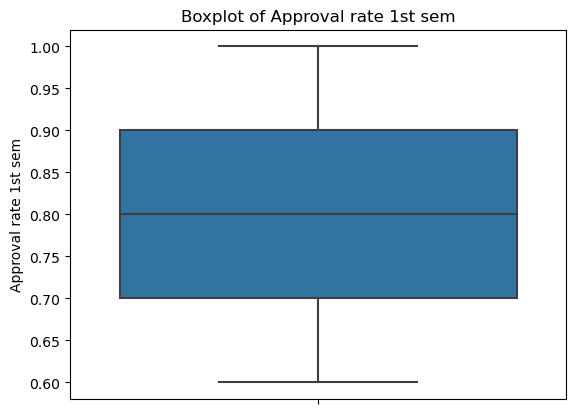

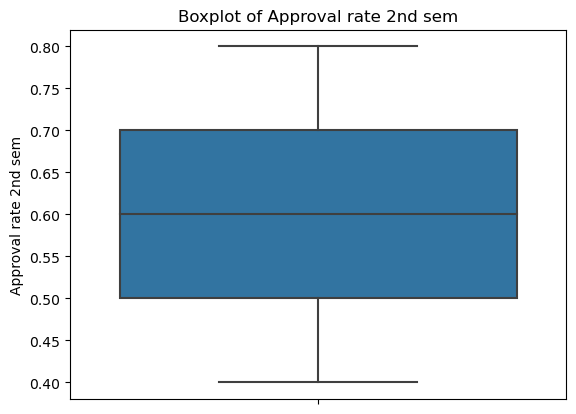

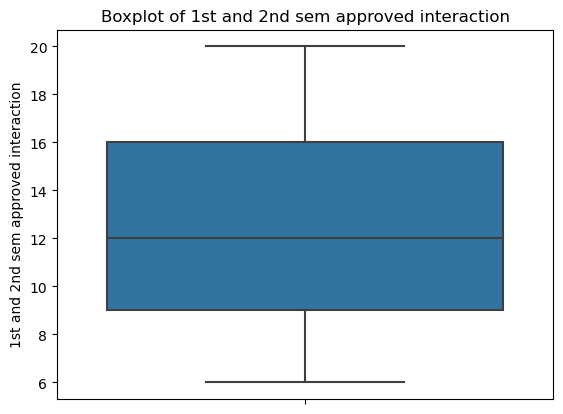

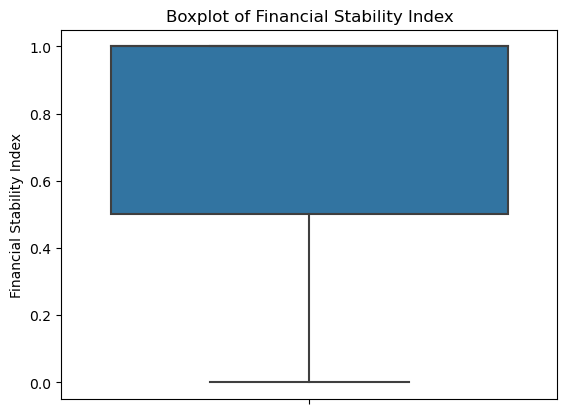

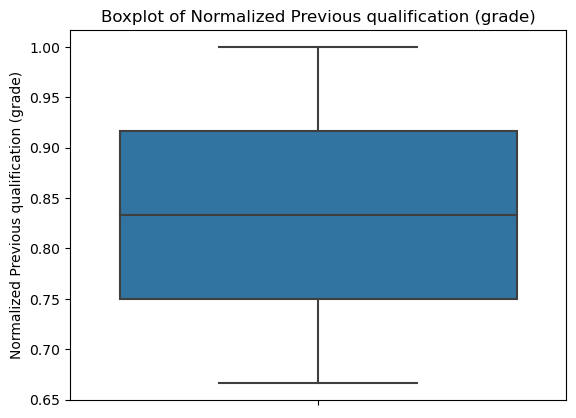

In [14]:
# Follow up EDA with new fwtures

# List of new feature names
new_features = [
    'Approval rate 1st sem', 
    'Approval rate 2nd sem', 
    'Binned age', 
    '1st and 2nd sem approved interaction', 
    'Financial Stability Index', 
    'Normalized Previous qualification (grade)'
]

# Histograms/Density Plots for Distribution Analysis
for feature in new_features:
    if X[feature].dtype == 'float64' or X[feature].dtype == 'int64':  # For continuous variables
        sns.histplot(X[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.savefig(f'EDA_visualizations_w_Feature_Engineering/distribution_{feature}.png')
        plt.show()
    elif X[feature].dtype.name == 'category':  # For categorical variables
        sns.countplot(x=feature, data=X)
        plt.title(f'Count Plot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.savefig(f'EDA_visualizations_w_Feature_Engineering/countplot_{feature}.png')
        plt.show()

# Correlation Analysis with the target

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_series = pd.Series(y_encoded)
X_encoded = pd.get_dummies(X, columns=['Binned age']) # For categorical features in X

new_features = [feature for feature in new_features if feature != 'Binned age']
new_features.extend([col for col in X_encoded.columns if 'Binned age' in col])

# Now recalculate correlation with the numerically encoded target
correlation_with_target = pd.concat([X_encoded[new_features], y_series], axis=1).corr().iloc[-1].sort_values(ascending=False)
print("Correlation with Target:\n", correlation_with_target)

# Boxplots for Outlier Detection
for feature in new_features:
    # Check if the feature is in the encoded DataFrame X_encoded
    if feature in X_encoded.columns:
        # Determine the data type of the feature in X_encoded
        if X_encoded[feature].dtype == 'float64' or X_encoded[feature].dtype == 'int64':  # For continuous variables
            sns.boxplot(y=X_encoded[feature])
            plt.title(f'Boxplot of {feature}')
            plt.ylabel(feature)
            plt.savefig(f'EDA_visualizations_w_Feature_Engineering/boxplot_{feature}.png')
            plt.show()

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Identifying categorical columns (assuming columns with <= 10 unique values as categorical)
categorical_cols = [col for col in data.columns if data[col].nunique() <= 10 and col != 'Target']

# Applying One-Hot Encoding to categorical columns
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical_data = pd.DataFrame(one_hot_encoder.fit_transform(data[categorical_cols]))
encoded_categorical_data.columns = one_hot_encoder.get_feature_names(categorical_cols)

# Dropping original categorical columns and adding encoded ones
data_encoded = data.drop(categorical_cols, axis=1)
data_encoded = pd.concat([data_encoded, encoded_categorical_data], axis=1)

# Normalizing/Standardizing numerical features
numerical_cols = data_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Splitting the dataset into training and testing sets
X = data_encoded.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


AttributeError: 'dict' object has no attribute 'columns'